# GUC Clustering Project 

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



Running this project require the following imports 

In [1]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   
from sklearn.preprocessing import StandardScaler
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
#from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN

from scipy.cluster.hierarchy import linkage
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram

%matplotlib inline

In [2]:
def display_cluster(X, cluster_labels, num_clusters):
    unique_labels = np.unique(cluster_labels)
    colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))

    for i, label in enumerate(unique_labels):
        if label == -1:
            plt.scatter(X[cluster_labels == label, 0], X[cluster_labels == label, 1], c='gray', alpha=0.5, label='Noise')
        else:
            plt.scatter(X[cluster_labels == label, 0], X[cluster_labels == label, 1], c=colors[i], alpha=0.5, label=f'Cluster {label}')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Place legend outside the plot
    plt.show()

# Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



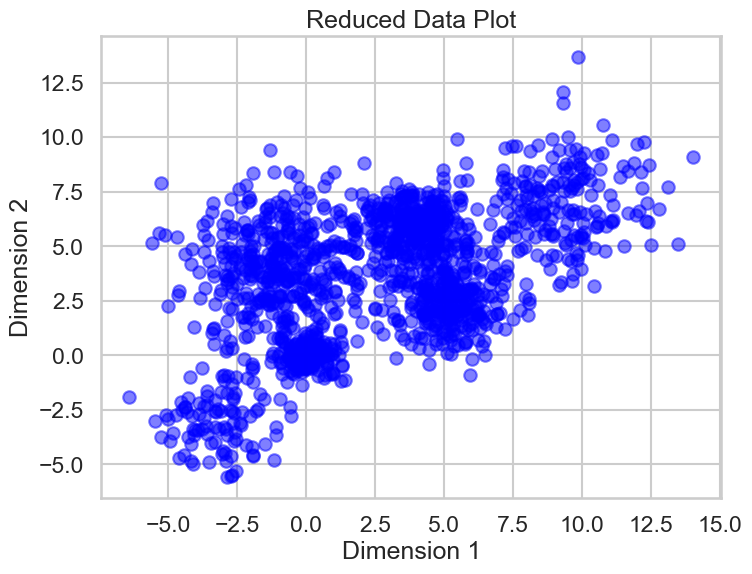

In [3]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
x = [point[0] for point in Multi_blob_Data]
y = [point[1] for point in Multi_blob_Data]

# Plot the reduced data
plt.figure(figsize=(8, 6))
plt.scatter(x, y, c='blue', alpha=0.5)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Reduced Data Plot')
plt.grid(True)
plt.show()

## Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

In [55]:
def K_Mean(iris_data):
    k_values = range(2, 11)
    
    # Lists to store silhouette scores
    silhouette_scores = []
    
    # Best silhouette score and corresponding number of clusters
    best_silhouette_score = -1
    best_k = -1
    
    # Perform K-means clustering for each K value
    for k in k_values:
        # Fit K-means model
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(iris_data)
        
        # Predict clusters and calculate silhouette score
        cluster_labels = kmeans.predict(iris_data)
        silhouette_avg = silhouette_score(iris_data, cluster_labels)
        silhouette_scores.append(silhouette_avg)
        
        # Update best silhouette score and corresponding number of clusters
        if silhouette_avg > best_silhouette_score:
            best_silhouette_score = silhouette_avg
            best_k = k
        
    # Plot clusters for best K value
    if best_k != -1:
        kmeans = KMeans(n_clusters=best_k)
        cluster_labels = kmeans.fit_predict(iris_data)
        plt.title(f'Clustering for K={best_k}')
        display_cluster(iris_data, cluster_labels, best_k)
        plt.show()
        
    # Plot distortion and silhouette score
    plt.plot(k_values, silhouette_scores, marker='o')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score vs. Number of Clusters')
    plt.show()

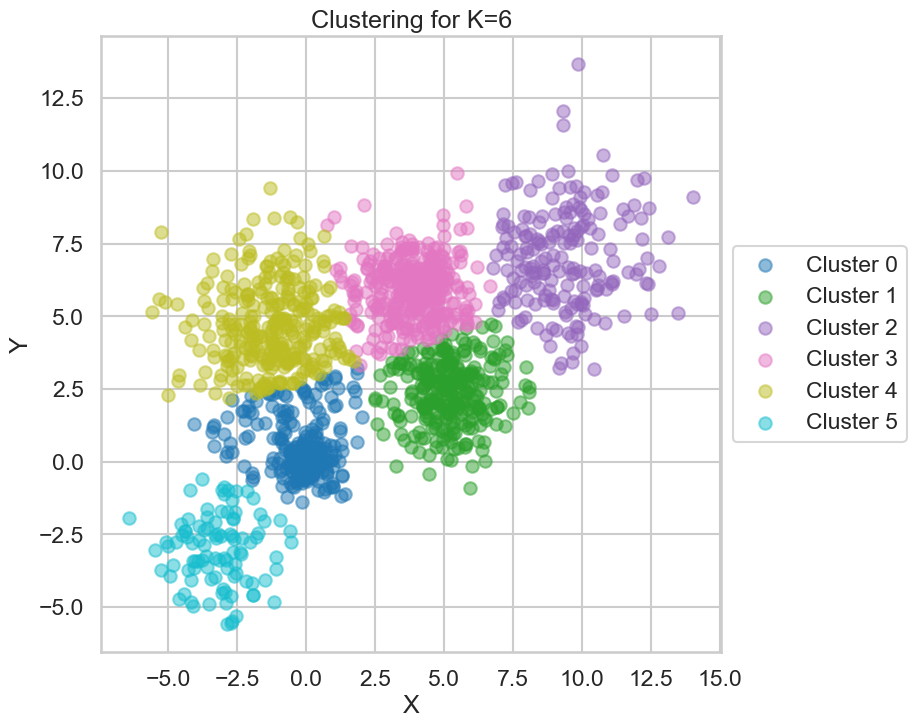

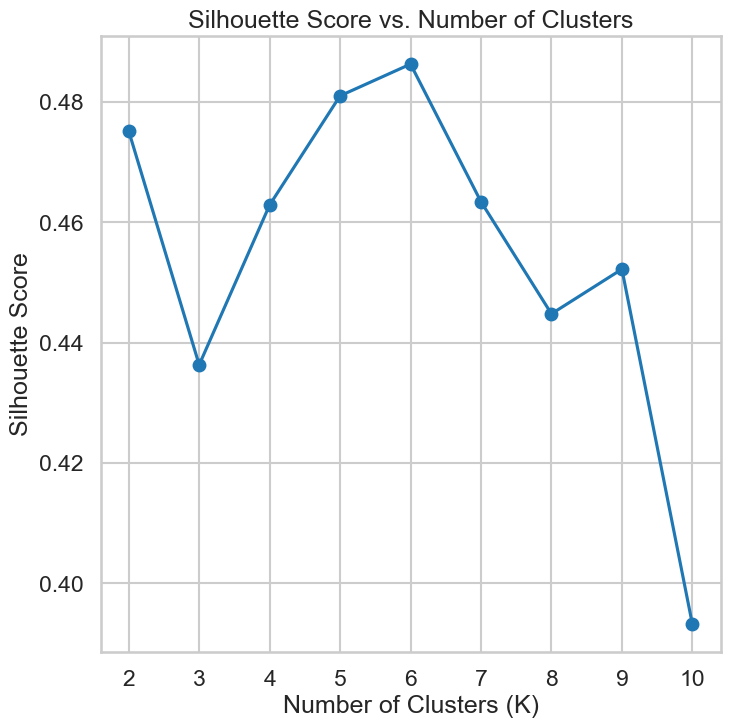

In [59]:
K_Mean(Multi_blob_Data)

## Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

In [56]:
def Hierarchal_Clustering(iris_data):
    affinities = ['euclidean', 'manhattan', 'cosine']
    linkages = ['average', 'single']
    distance_thresholds = [0.1, 0.5, 1.0] 
    best_silhouette_score = -1
    best_parameters = {}
    best_linkage_matrix = None
    for affinity in affinities:
        for linkage_type in linkages:
            for distance_threshold in distance_thresholds:
                # Perform Agglomerative Clustering
                hierarchical = AgglomerativeClustering(n_clusters=None, affinity=affinity, linkage=linkage_type, distance_threshold=distance_threshold)
                cluster_assignments = hierarchical.fit_predict(iris_data)
                
                # Check if there is more than one cluster formed
                if len(np.unique(cluster_assignments)) > 1:
                    # Calculate Silhouette Score
                    silhouette_avg = silhouette_score(iris_data, cluster_assignments)
                    if silhouette_avg > best_silhouette_score:
                        best_silhouette_score = silhouette_avg
                        best_parameters = {'affinity': affinity, 'linkage': linkage_type, 'distance_threshold': distance_threshold}
                        best_linkage_matrix = linkage(iris_data, method=linkage_type)
                    print(f"Affinity: {affinity}, Linkage: {linkage_type}, Distance Threshold: {distance_threshold}, Silhouette Score: {silhouette_avg}")
                else:
                    print(f"Affinity: {affinity}, Linkage: {linkage_type}, Distance Threshold: {distance_threshold}, Only one cluster formed, cannot compute silhouette score")
    
    # Plot Dendrogram for best parameters
    if best_linkage_matrix is not None:
        plt.figure(figsize=(8, 6))
        dendrogram(best_linkage_matrix, no_labels=True)
        plt.title(f"Dendrogram - Affinity: {best_parameters['affinity']}, Linkage: {best_parameters['linkage']}, Distance Threshold: {best_parameters['distance_threshold']}")
        plt.xlabel('Sample Index')
        plt.ylabel('Distance')
        plt.show()
    else:
        print("No suitable parameters found to plot dendrogram")
    print(f'Best Silhouette Score: {best_silhouette_score}')
    print('Best Parameters:', best_parameters)

Affinity: euclidean, Linkage: average, Distance Threshold: 0.1, Silhouette Score: 0.18751896464403853
Affinity: euclidean, Linkage: average, Distance Threshold: 0.5, Silhouette Score: 0.3743241305054595
Affinity: euclidean, Linkage: average, Distance Threshold: 1.0, Silhouette Score: 0.32384977908646284
Affinity: euclidean, Linkage: single, Distance Threshold: 0.1, Silhouette Score: 0.1764277949915988
Affinity: euclidean, Linkage: single, Distance Threshold: 0.5, Silhouette Score: -0.4596550259264691
Affinity: euclidean, Linkage: single, Distance Threshold: 1.0, Silhouette Score: -0.14944154607335855
Affinity: manhattan, Linkage: average, Distance Threshold: 0.1, Silhouette Score: 0.15171114923101417
Affinity: manhattan, Linkage: average, Distance Threshold: 0.5, Silhouette Score: 0.37556682733402785
Affinity: manhattan, Linkage: average, Distance Threshold: 1.0, Silhouette Score: 0.34093328073765305
Affinity: manhattan, Linkage: single, Distance Threshold: 0.1, Silhouette Score: 0.151

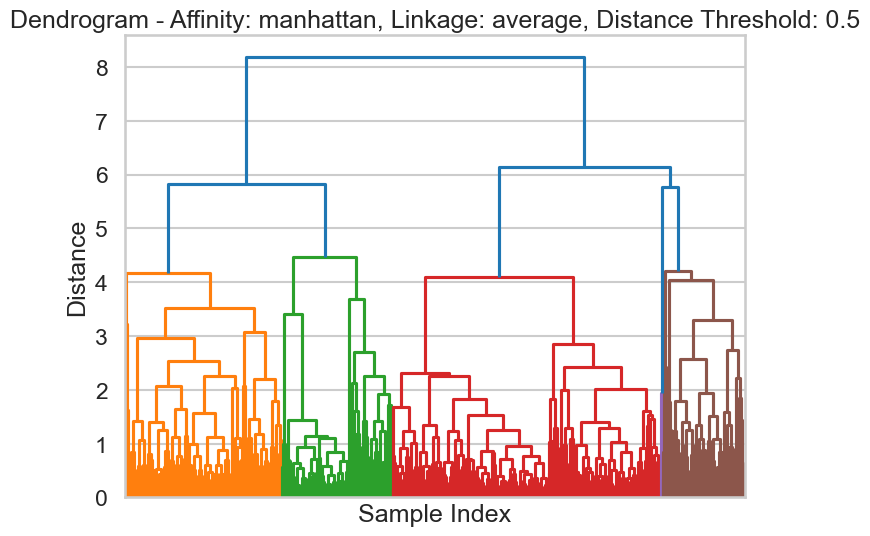

Best Silhouette Score: 0.37556682733402785
Best Parameters: {'affinity': 'manhattan', 'linkage': 'average', 'distance_threshold': 0.5}


In [62]:
Hierarchal_Clustering(Multi_blob_Data)

## DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

In [57]:
def DBScan(iris_data):
    eps_values = np.linspace(0.1, 3, 30)
    min_samples_values = np.arange(5, 26)
    best_score = -1  # Initialize best silhouette score
    best_parameters = None  # Initialize parameters corresponding to the best score
    silhouette_scores = []
    
    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            cluster_labels = dbscan.fit_predict(iris_data)
            unique_labels = np.unique(cluster_labels)
            num_clusters = len(unique_labels) - (1 if -1 in cluster_labels else 0)  # Exclude noise points
    
            if num_clusters > 1:  # Ensure at least two clusters are formed
                silhouette_avg = silhouette_score(iris_data, cluster_labels)
                silhouette_scores.append((eps, min_samples, silhouette_avg))

                if silhouette_avg > best_score:
                    best_score = silhouette_avg
                    best_parameters = (eps, min_samples)
    
    if best_parameters is not None:
        best_eps, best_min_samples = best_parameters
        dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
        best_cluster_labels = dbscan.fit_predict(iris_data)
        num_clusters = len(np.unique(best_cluster_labels)) - (1 if -1 in best_cluster_labels else 0)
        plt.title(f'DBSCAN Clustering Results (eps={best_eps}, min_samples={best_min_samples}, Silhouette Score={best_score:.2f})')
        display_cluster(iris_data, best_cluster_labels, num_clusters)
    else:
        print("No suitable parameters found for DBSCAN clustering.")
    
    silhouette_scores = np.array(silhouette_scores)
    eps_values_unique = np.unique(silhouette_scores[:, 0])
    min_samples_values_unique = np.unique(silhouette_scores[:, 1])
    
    plt.figure(figsize=(10, 6))
    for min_samples in min_samples_values_unique:
        scores = silhouette_scores[silhouette_scores[:, 1] == min_samples]
        plt.plot(scores[:, 0], scores[:, 2], label=f'min_samples={min_samples}')
    
    plt.xlabel('EPS')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score vs. EPS for Different min_samples')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    plt.figure(figsize=(10, 6))
    for eps in eps_values_unique:
        scores = silhouette_scores[silhouette_scores[:, 0] == eps]
        plt.plot(scores[:, 1], scores[:, 2], label=f'EPS={eps}')
    
    plt.xlabel('min_samples')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score vs. min_samples for Different EPS')
    plt.legend()
    plt.grid(True)
    plt.show()

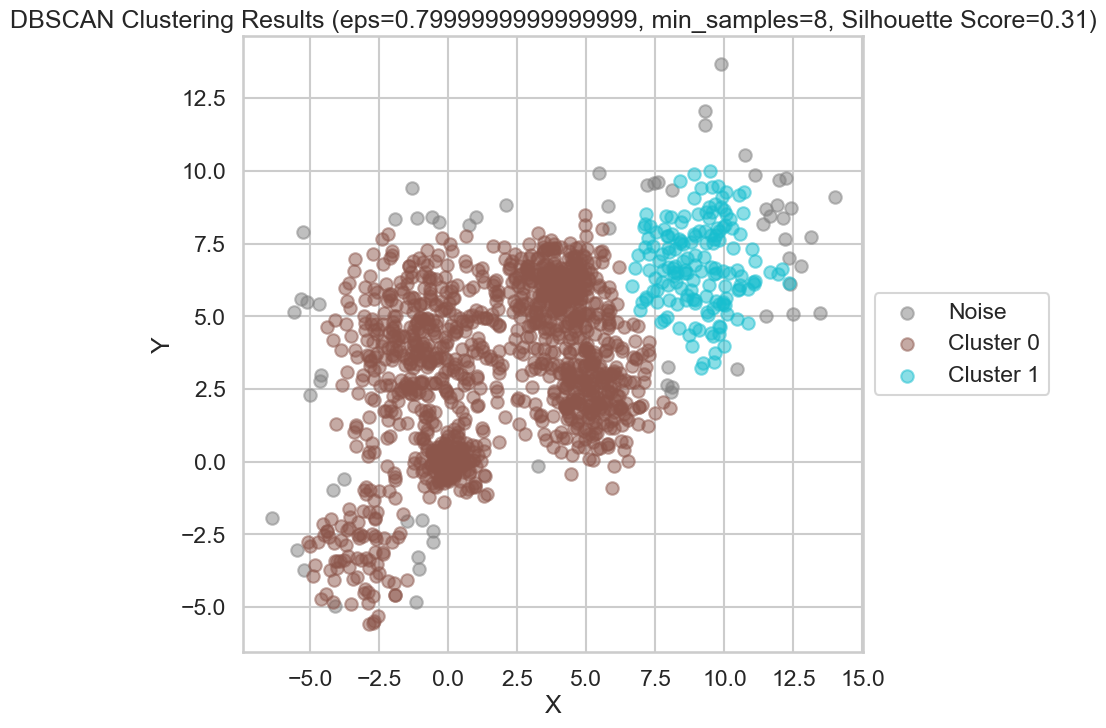

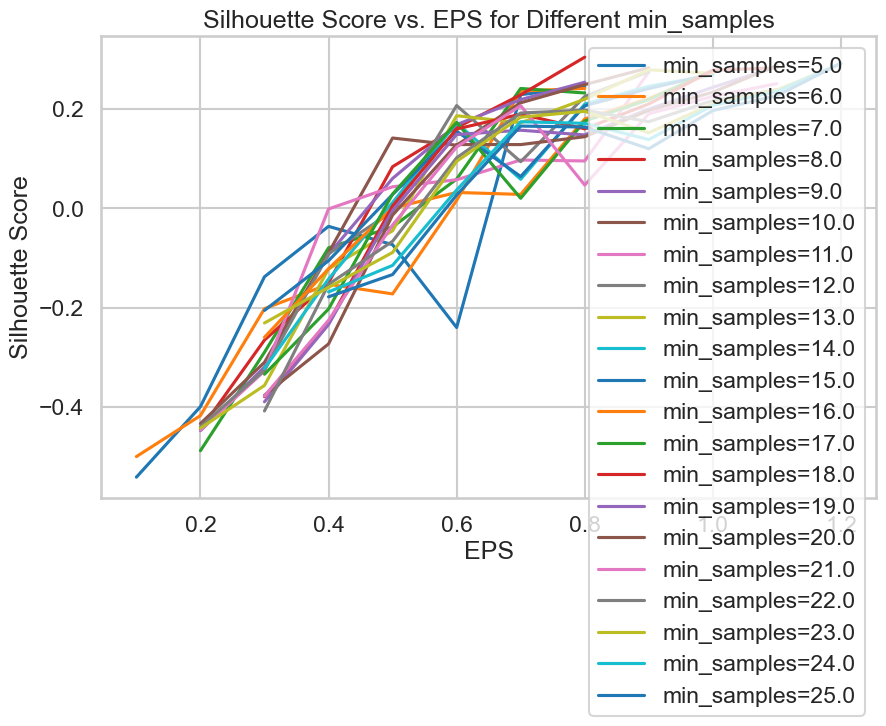

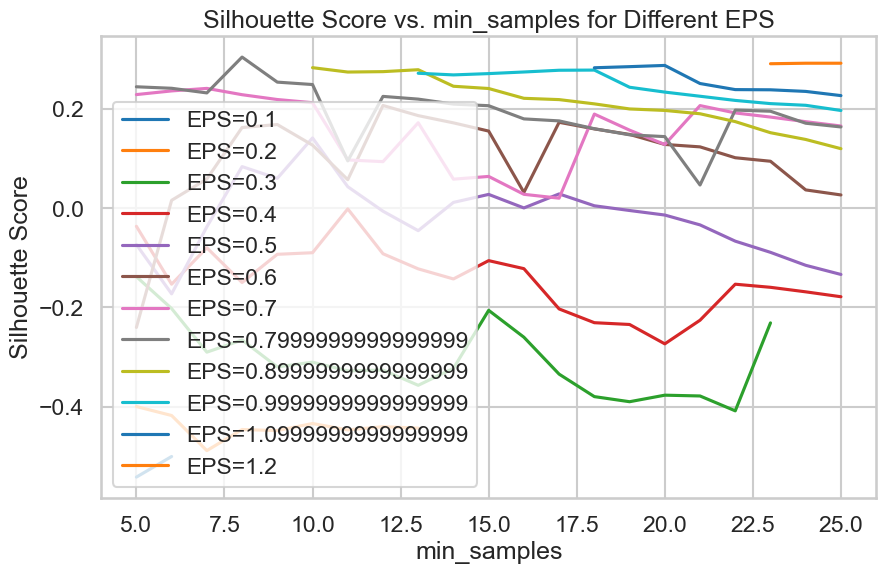

In [60]:
DBScan(Multi_blob_Data)

## Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

In [58]:
def Gaussian_cluster(iris_data):
    covariance_types = ['full', 'tied', 'diag', 'spherical']
    
    # Function to plot contours
    def plot_contours(ax, model, X):
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
        Z = -model.score_samples(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        ax.contour(xx, yy, Z, levels=10, linewidths=1, colors='k')
    
    # Perform GMM clustering with different covariance types
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    axs = axs.flatten()
    for i, cov_type in enumerate(covariance_types):
        gmm = GaussianMixture(n_components=3, covariance_type=cov_type, random_state=42)
        gmm.fit(iris_data)
        ax = axs[i]
        plot_contours(ax, gmm, iris_data)
        ax.scatter(iris_data[:, 0], iris_data[:, 1], marker='.', s=30, lw=0, alpha=0.7)
        ax.set_title(f'Covariance Type: {cov_type}')
    plt.tight_layout()
    plt.show()

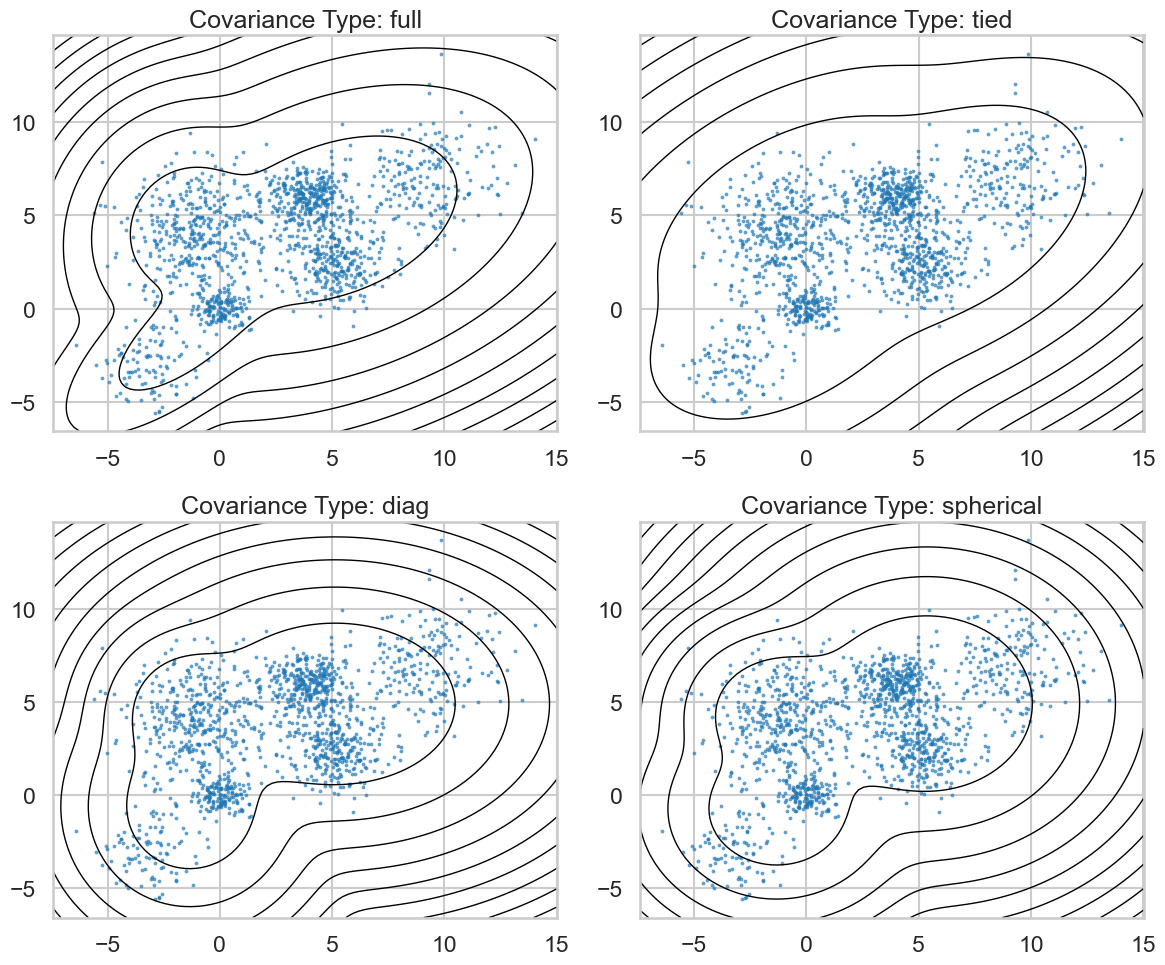

In [61]:
Gaussian_cluster(Multi_blob_Data)

# iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

In [13]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']

['setosa', 'versicolor', 'virginica']

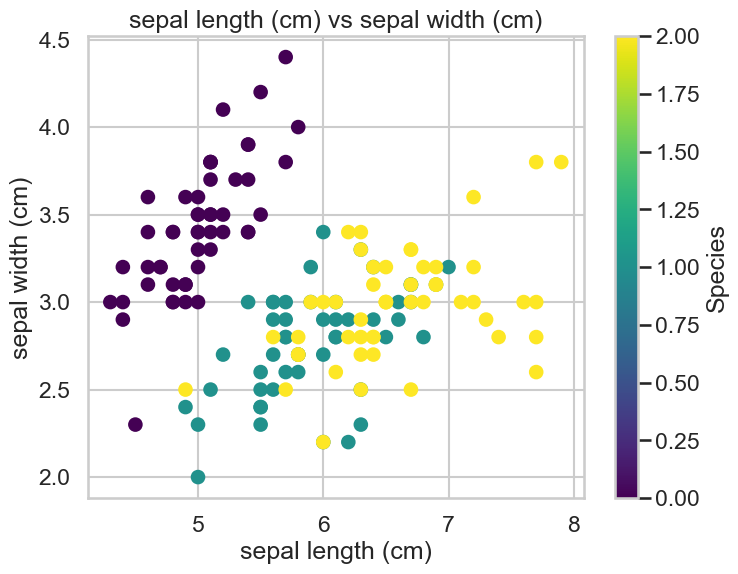

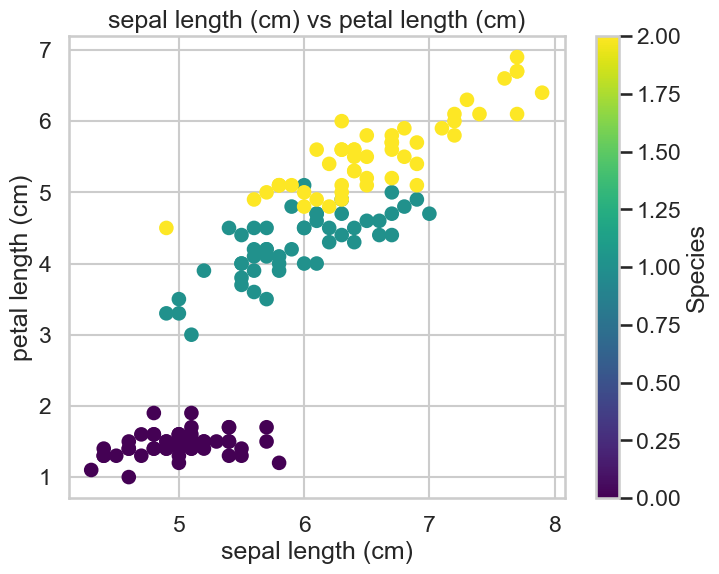

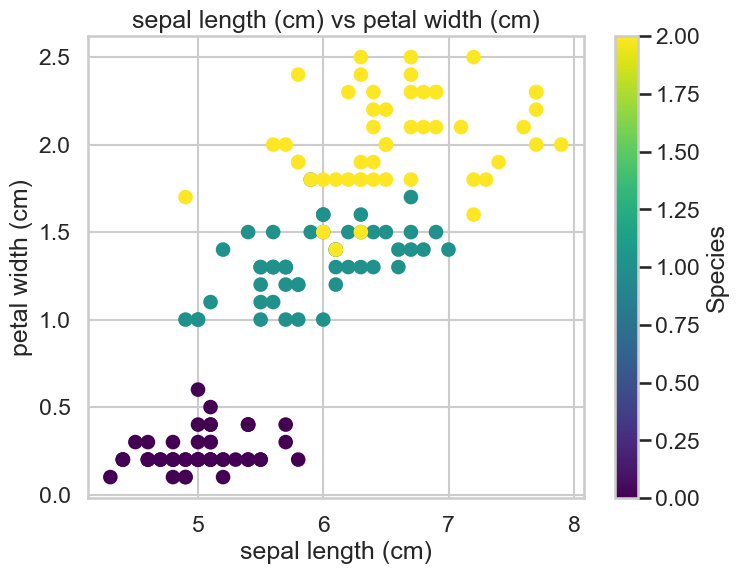

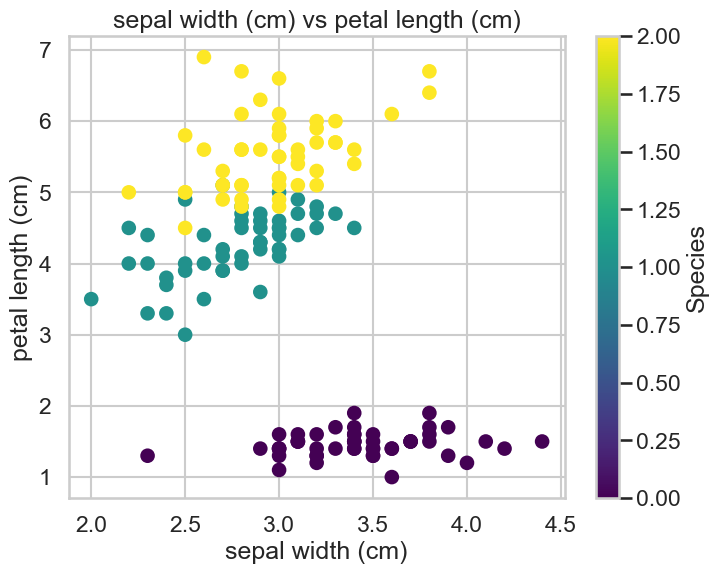

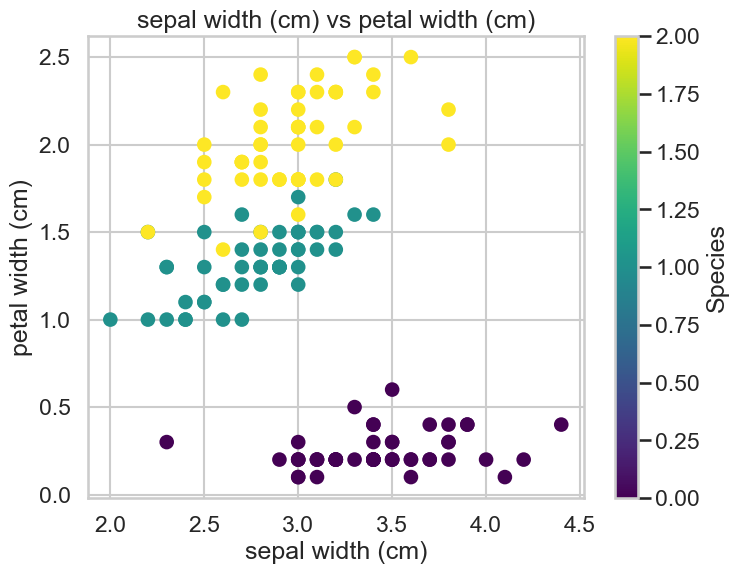

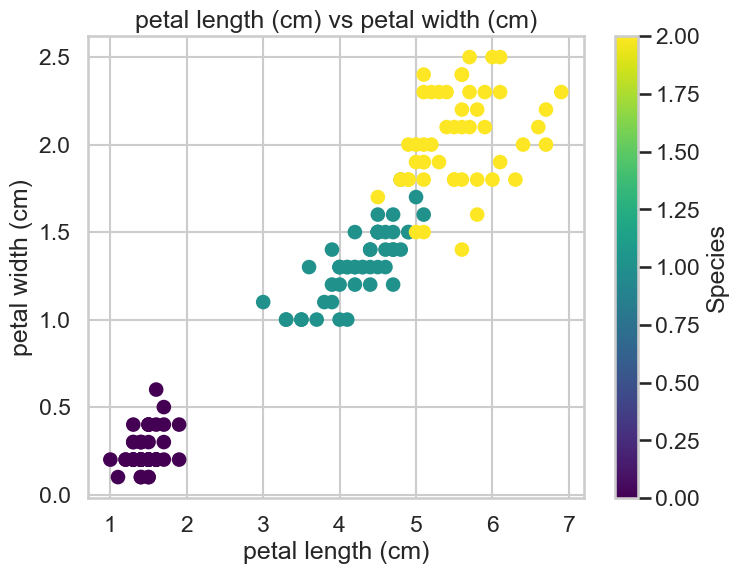

In [14]:
X = iris_data.data
y = iris_data.target

# Get feature names
feature_names = iris_data.feature_names

# Plot each pair of features against each other
for i in range(len(feature_names)):
    for j in range(i+1, len(feature_names)):
        plt.figure(figsize=(8, 6))
        plt.scatter(X[:, i], X[:, j], c=y, cmap='viridis')
        plt.xlabel(feature_names[i])
        plt.ylabel(feature_names[j])
        plt.title(f'{feature_names[i]} vs {feature_names[j]}')
        plt.colorbar(label='Species')
        plt.show()

## Comparison

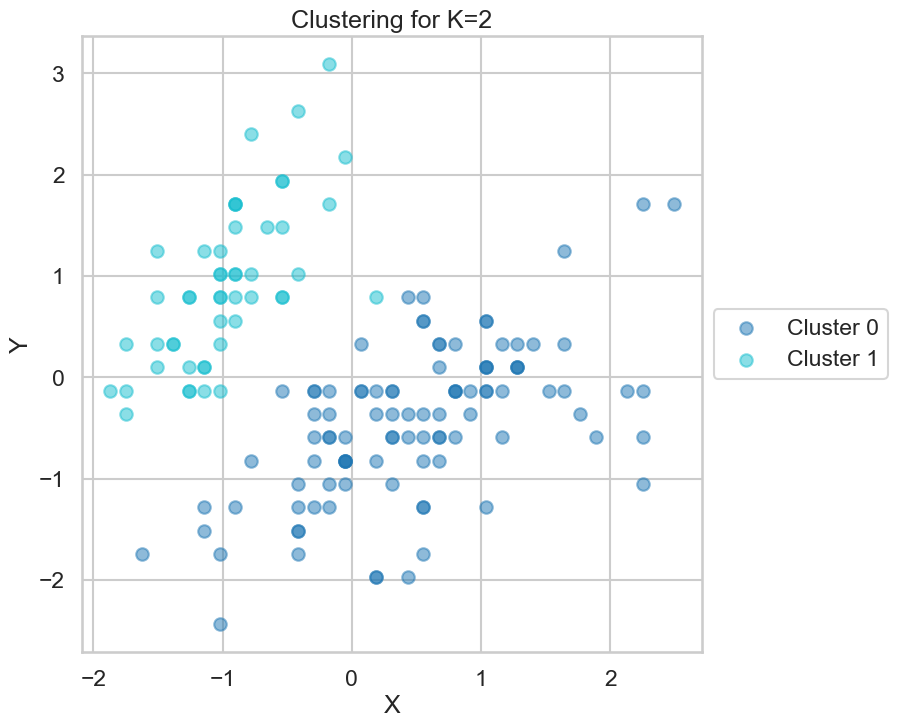

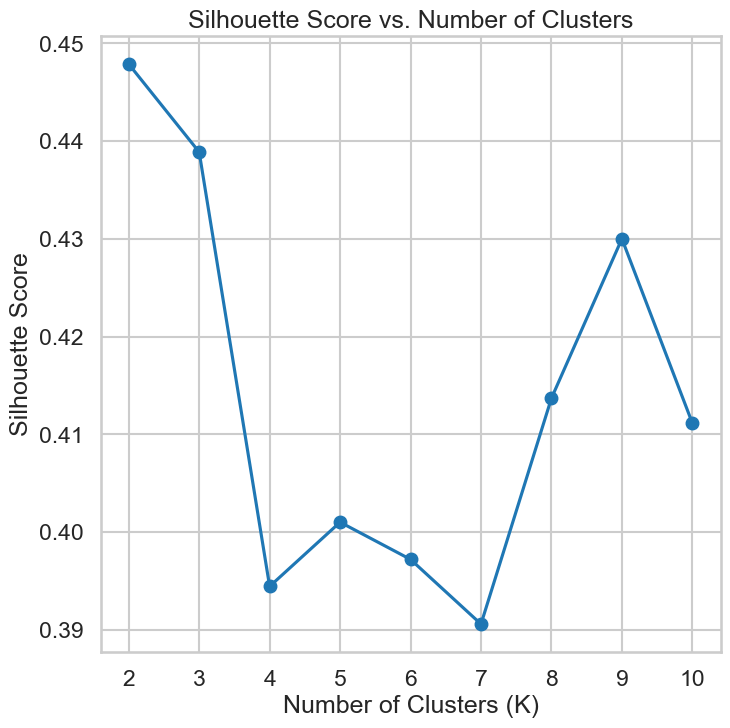

Affinity: euclidean, Linkage: average, Distance Threshold: 0.1, Silhouette Score: 0.3999999988694871
Affinity: euclidean, Linkage: average, Distance Threshold: 0.5, Silhouette Score: 0.38472399627085047
Affinity: euclidean, Linkage: average, Distance Threshold: 1.0, Silhouette Score: 0.3916007289945804
Affinity: euclidean, Linkage: single, Distance Threshold: 0.1, Silhouette Score: 0.3999999988694871
Affinity: euclidean, Linkage: single, Distance Threshold: 0.5, Silhouette Score: -0.01127333279090858
Affinity: euclidean, Linkage: single, Distance Threshold: 1.0, Only one cluster formed, cannot compute silhouette score
Affinity: manhattan, Linkage: average, Distance Threshold: 0.1, Silhouette Score: 0.3999999988694871
Affinity: manhattan, Linkage: average, Distance Threshold: 0.5, Silhouette Score: 0.39708804400587144
Affinity: manhattan, Linkage: average, Distance Threshold: 1.0, Silhouette Score: 0.39054954675124276
Affinity: manhattan, Linkage: single, Distance Threshold: 0.1, Silhou

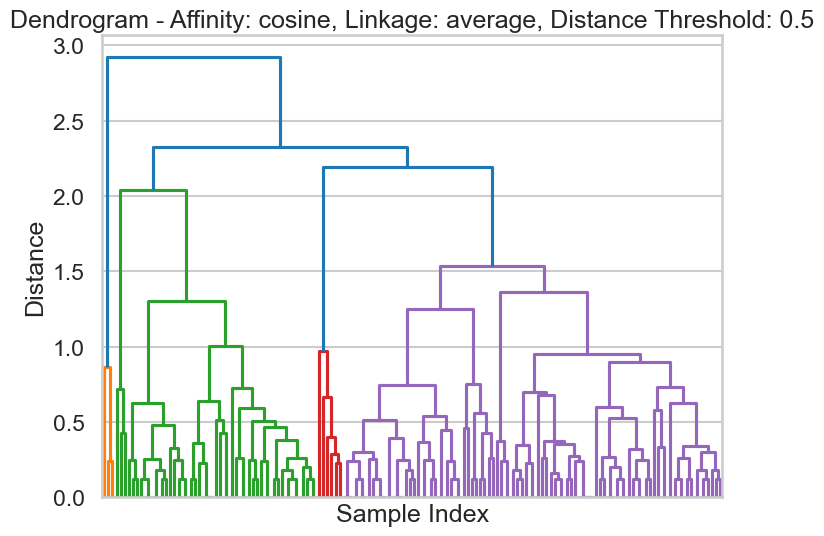

Best Silhouette Score: 0.4330196272810509
Best Parameters: {'affinity': 'cosine', 'linkage': 'average', 'distance_threshold': 0.5}


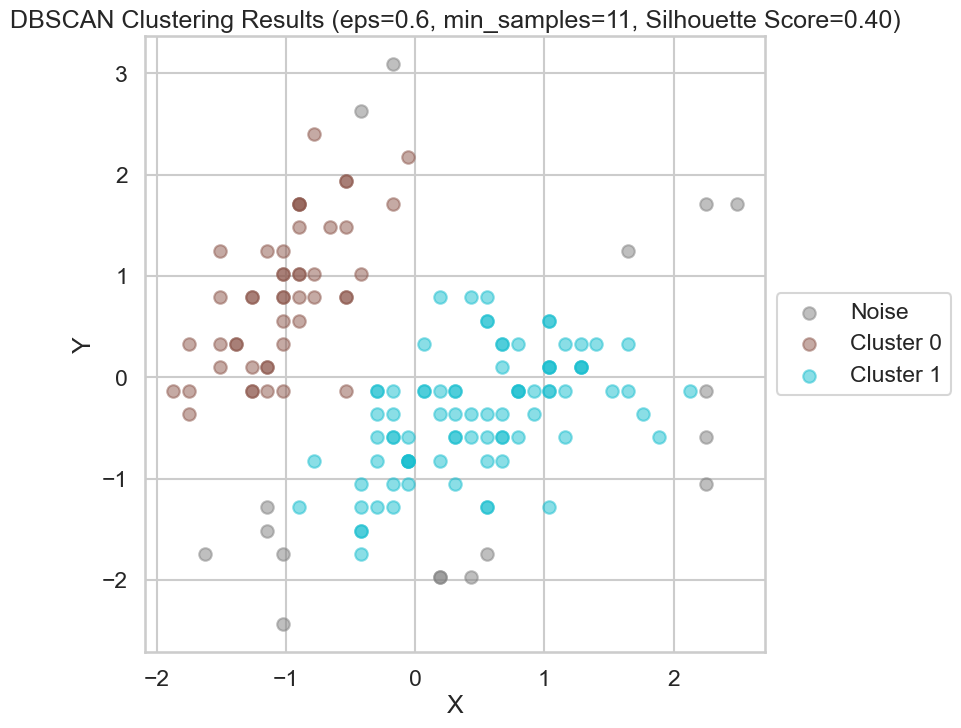

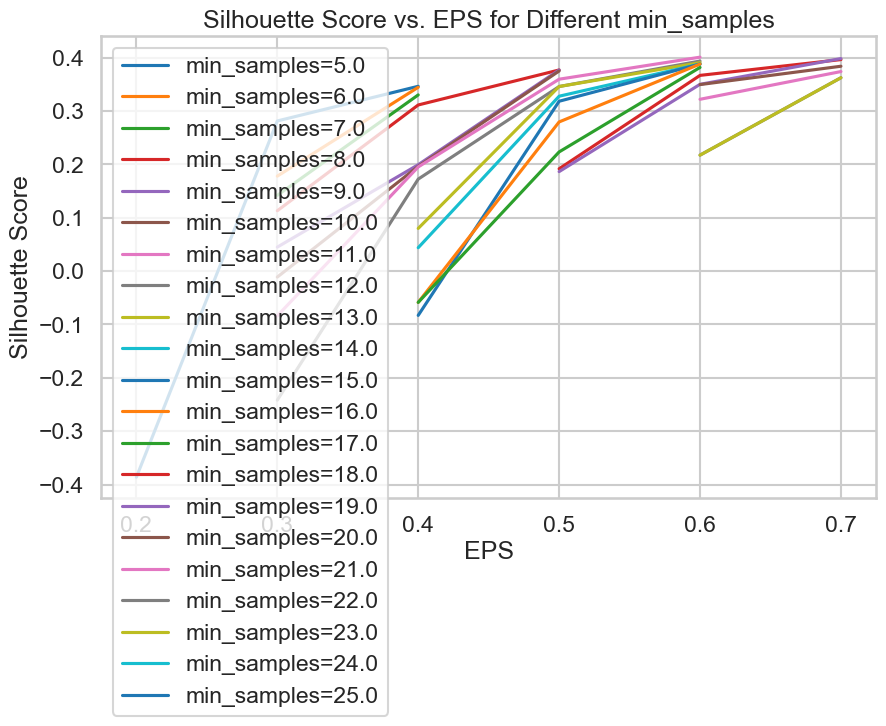

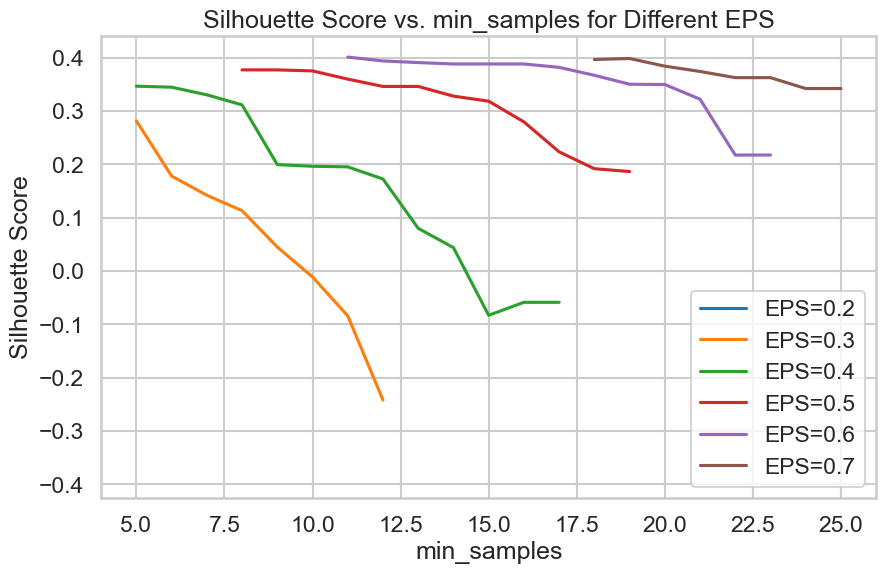

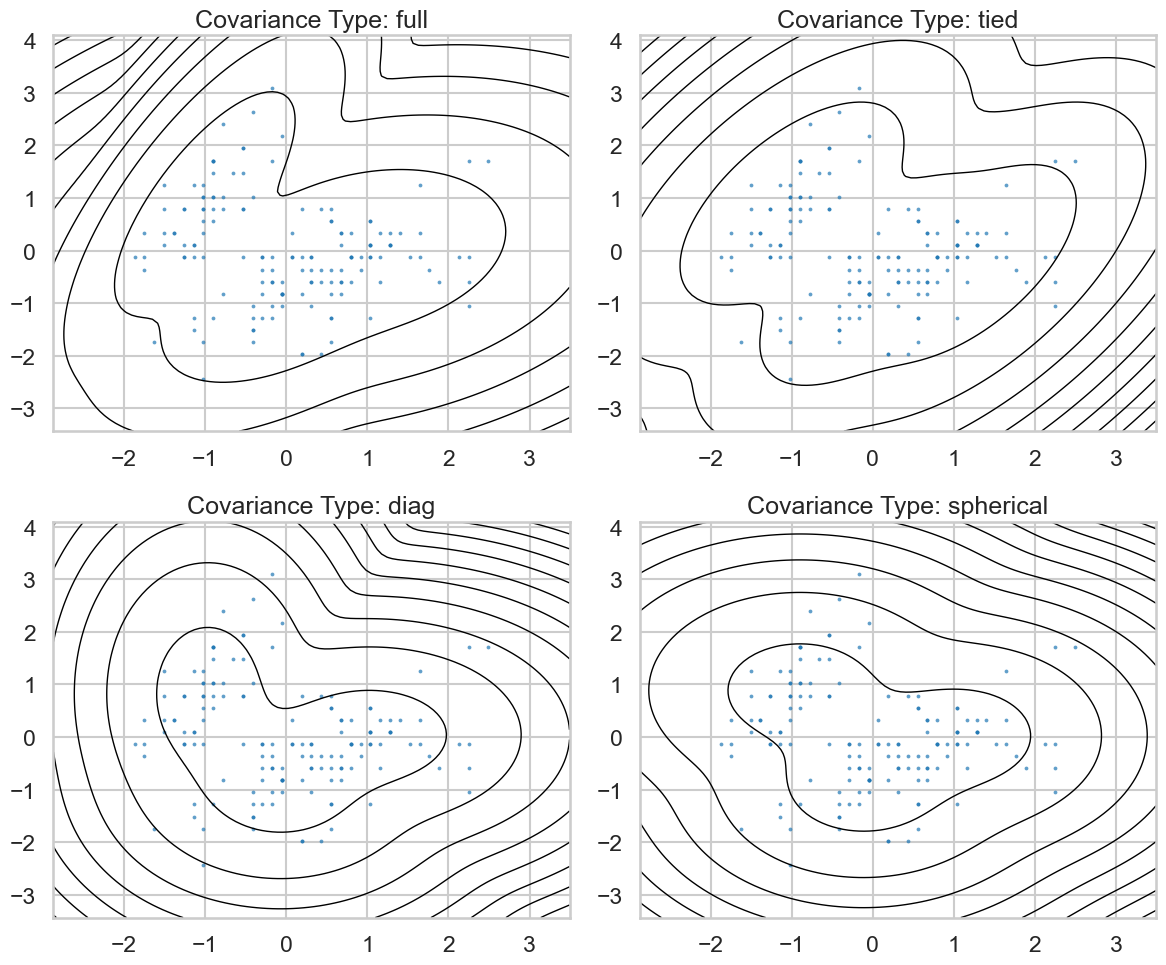

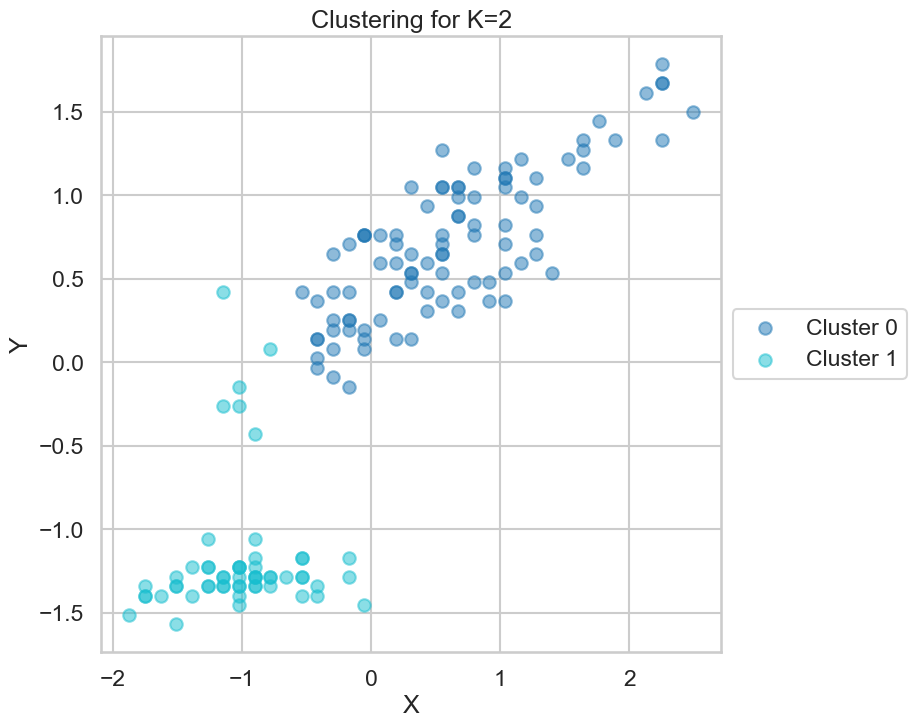

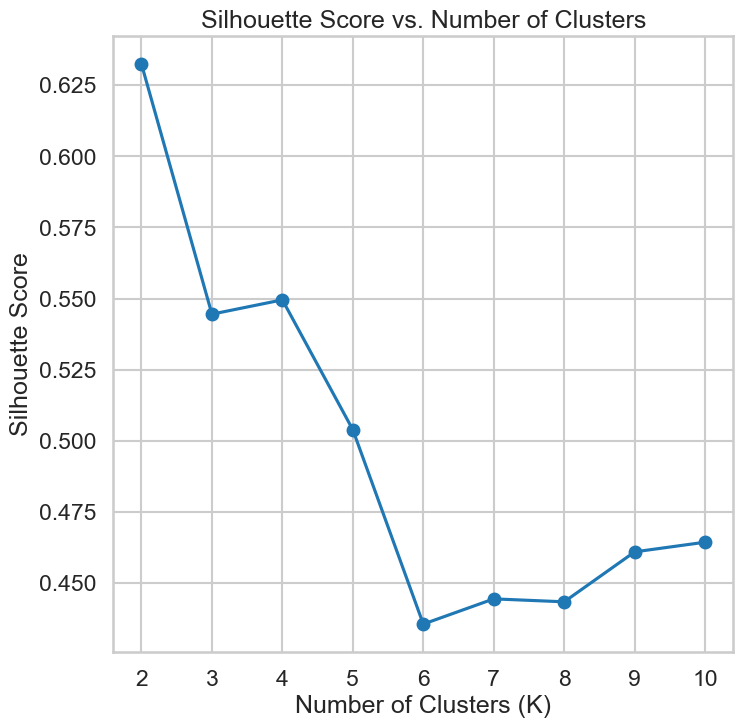

Affinity: euclidean, Linkage: average, Distance Threshold: 0.1, Silhouette Score: 0.3875209074714156
Affinity: euclidean, Linkage: average, Distance Threshold: 0.5, Silhouette Score: 0.4386863329686965
Affinity: euclidean, Linkage: average, Distance Threshold: 1.0, Silhouette Score: 0.4758006530573545
Affinity: euclidean, Linkage: single, Distance Threshold: 0.1, Silhouette Score: 0.3637854746272168
Affinity: euclidean, Linkage: single, Distance Threshold: 0.5, Silhouette Score: 0.6174827106558982
Affinity: euclidean, Linkage: single, Distance Threshold: 1.0, Only one cluster formed, cannot compute silhouette score
Affinity: manhattan, Linkage: average, Distance Threshold: 0.1, Silhouette Score: 0.3875209074714156
Affinity: manhattan, Linkage: average, Distance Threshold: 0.5, Silhouette Score: 0.4019515975098961
Affinity: manhattan, Linkage: average, Distance Threshold: 1.0, Silhouette Score: 0.4758006530573545
Affinity: manhattan, Linkage: single, Distance Threshold: 0.1, Silhouette 

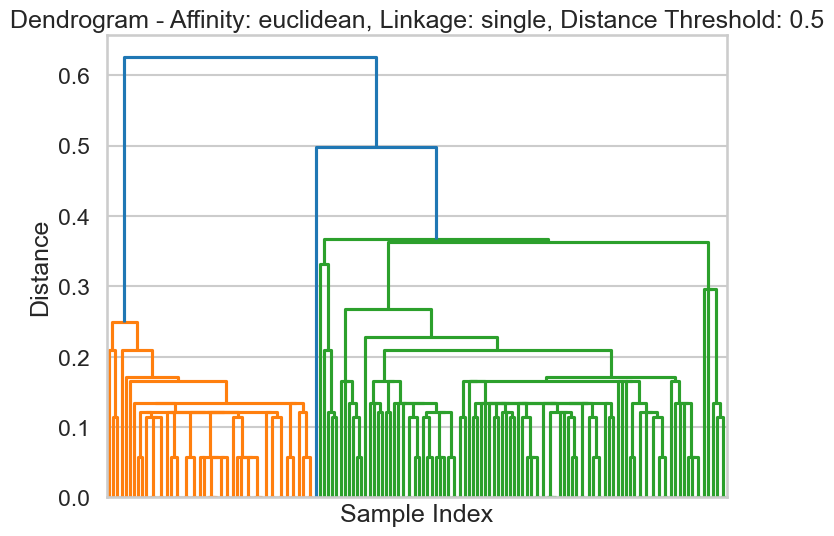

Best Silhouette Score: 0.6174827106558982
Best Parameters: {'affinity': 'euclidean', 'linkage': 'single', 'distance_threshold': 0.5}


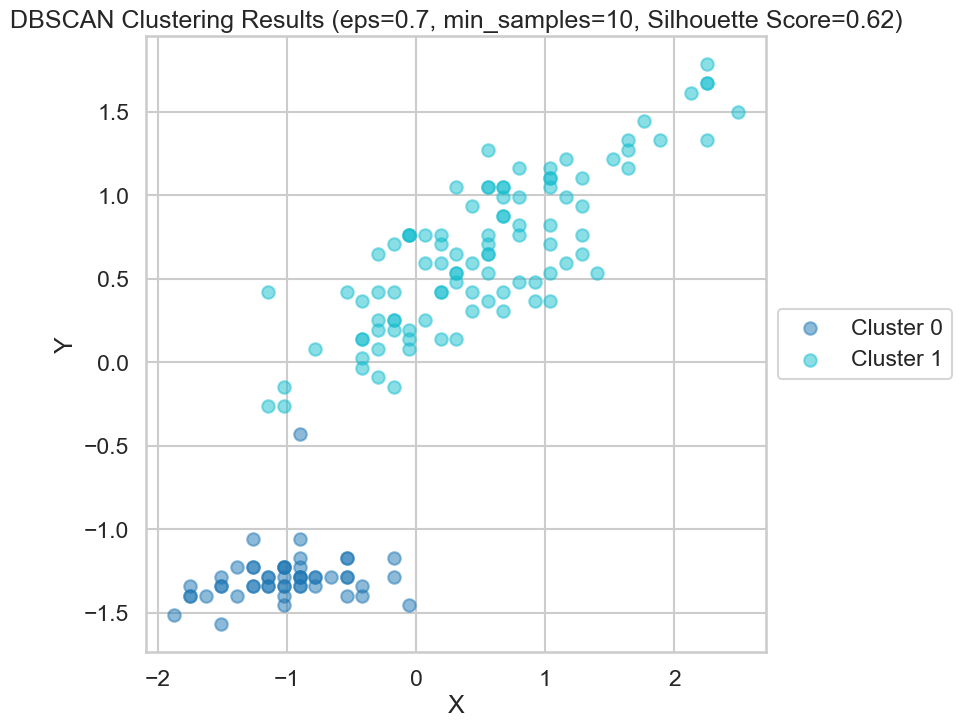

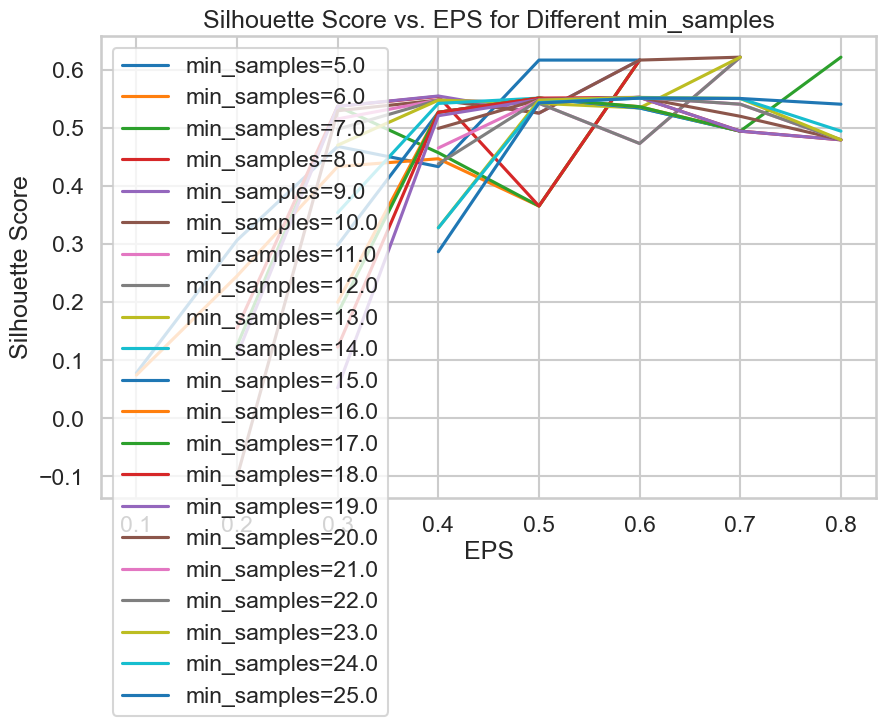

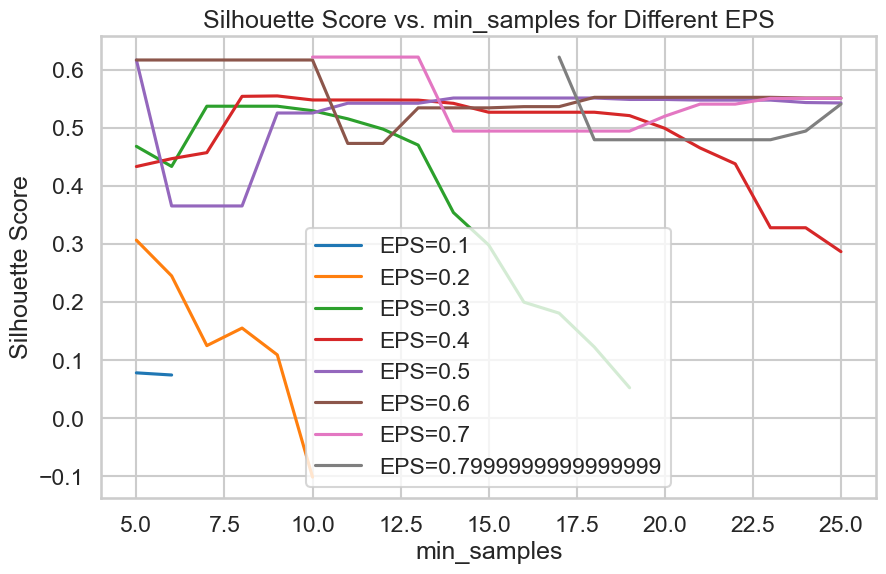

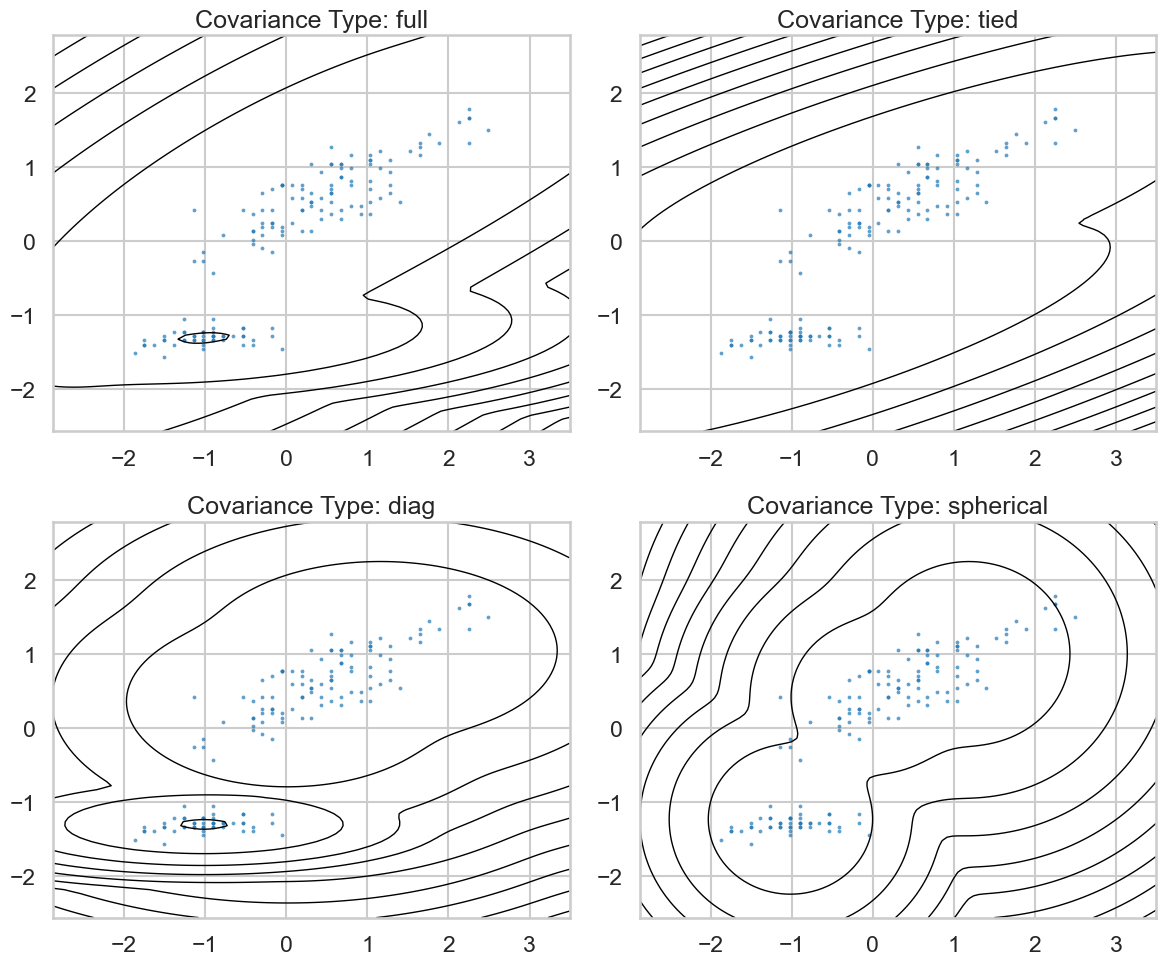

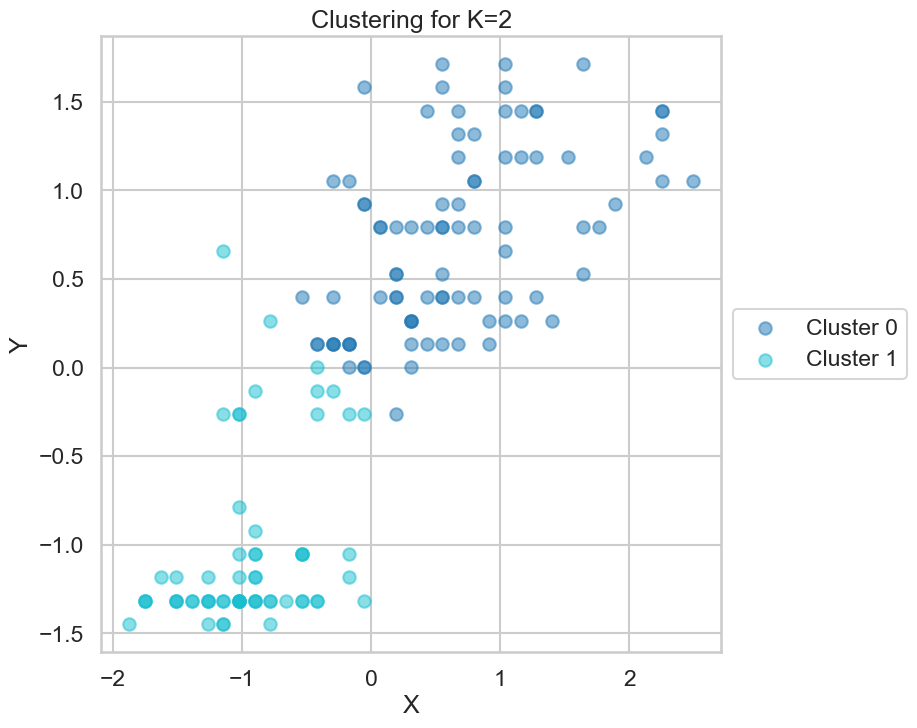

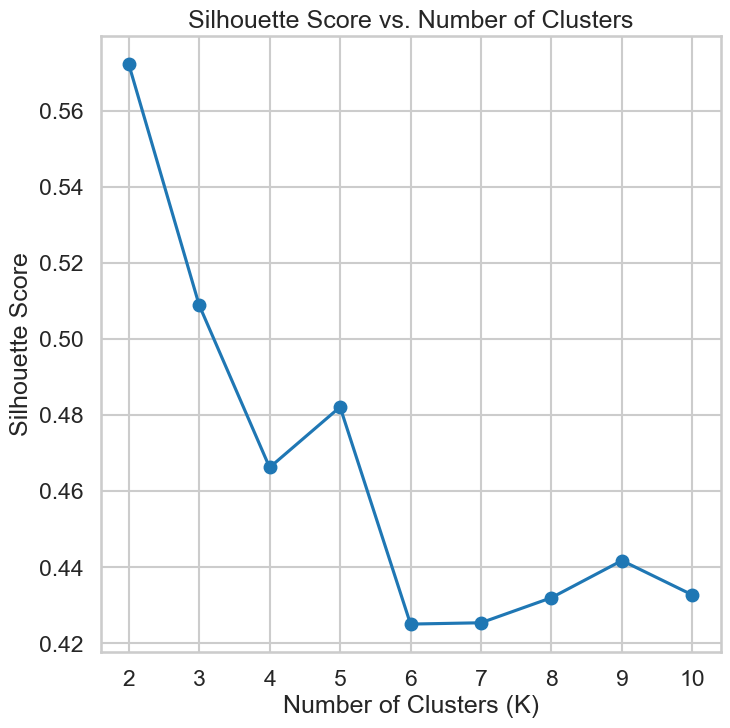

Affinity: euclidean, Linkage: average, Distance Threshold: 0.1, Silhouette Score: 0.4599999868821893
Affinity: euclidean, Linkage: average, Distance Threshold: 0.5, Silhouette Score: 0.427565006459396
Affinity: euclidean, Linkage: average, Distance Threshold: 1.0, Silhouette Score: 0.45282968162862713
Affinity: euclidean, Linkage: single, Distance Threshold: 0.1, Silhouette Score: 0.4599999868821893
Affinity: euclidean, Linkage: single, Distance Threshold: 0.5, Silhouette Score: 0.26145188730924696
Affinity: euclidean, Linkage: single, Distance Threshold: 1.0, Only one cluster formed, cannot compute silhouette score
Affinity: manhattan, Linkage: average, Distance Threshold: 0.1, Silhouette Score: 0.4599999868821893
Affinity: manhattan, Linkage: average, Distance Threshold: 0.5, Silhouette Score: 0.3984561727601269
Affinity: manhattan, Linkage: average, Distance Threshold: 1.0, Silhouette Score: 0.3986515446067774
Affinity: manhattan, Linkage: single, Distance Threshold: 0.1, Silhouette

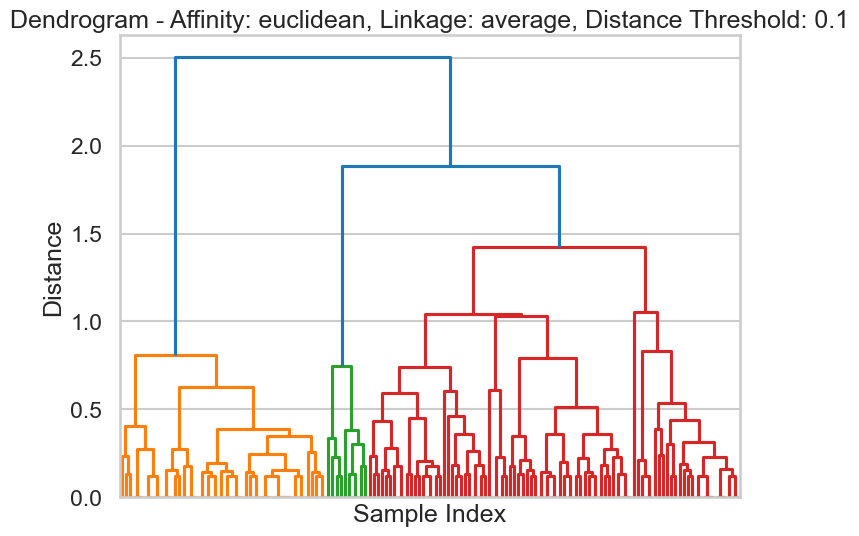

Best Silhouette Score: 0.4599999868821893
Best Parameters: {'affinity': 'euclidean', 'linkage': 'average', 'distance_threshold': 0.1}


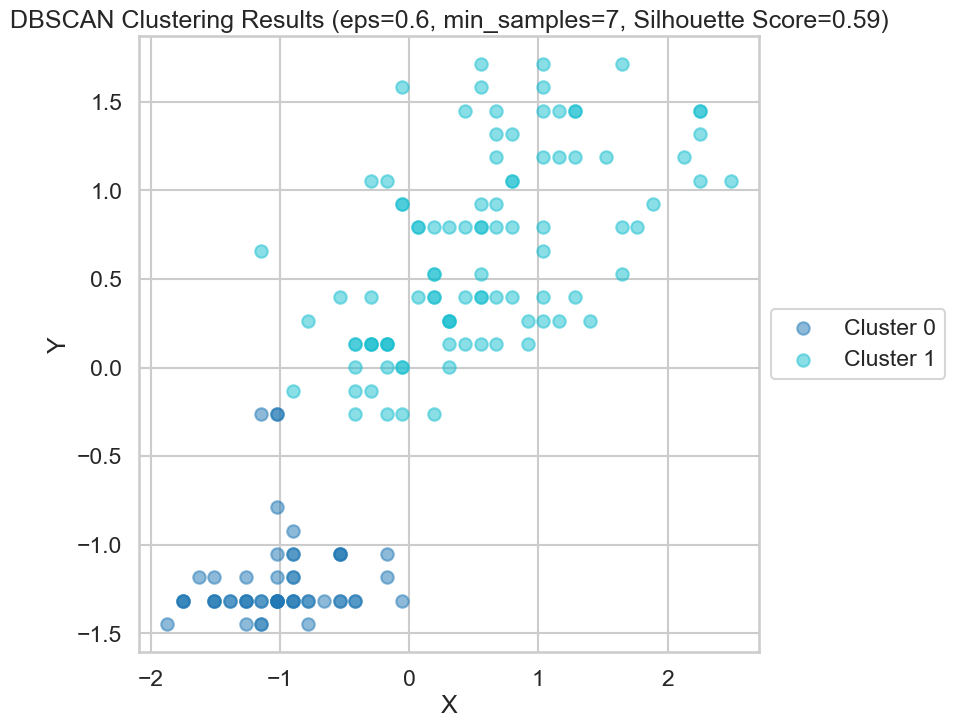

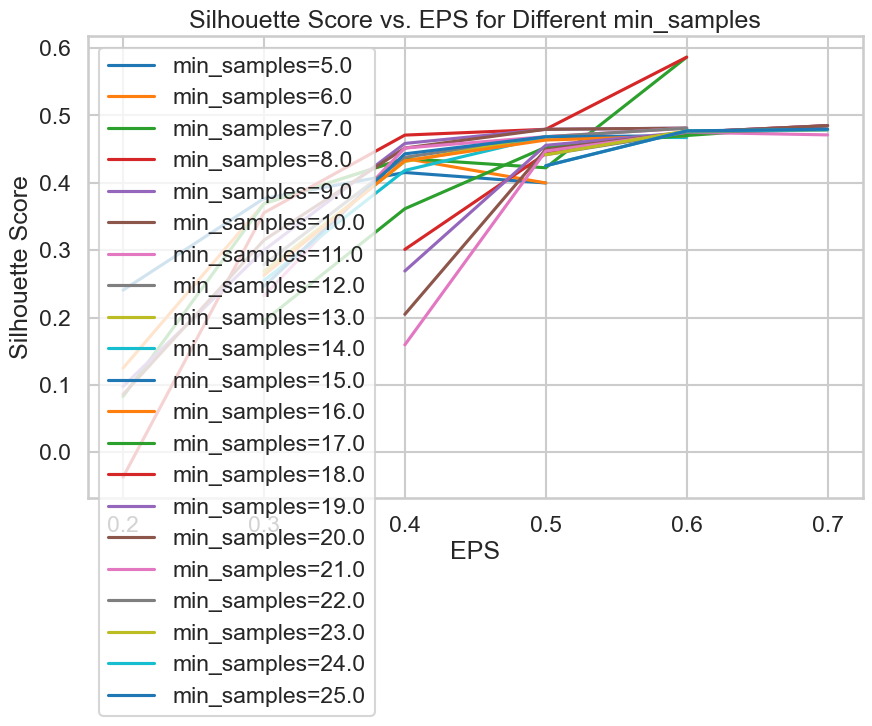

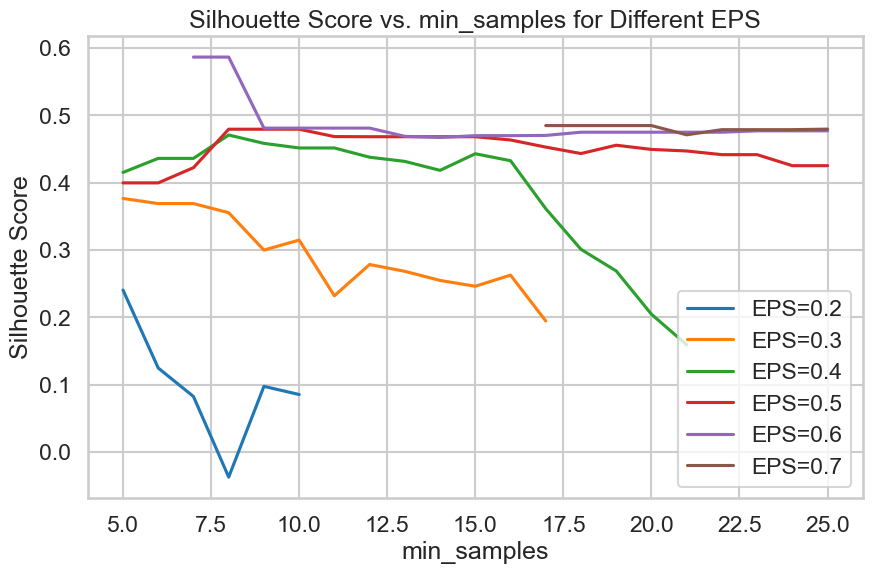

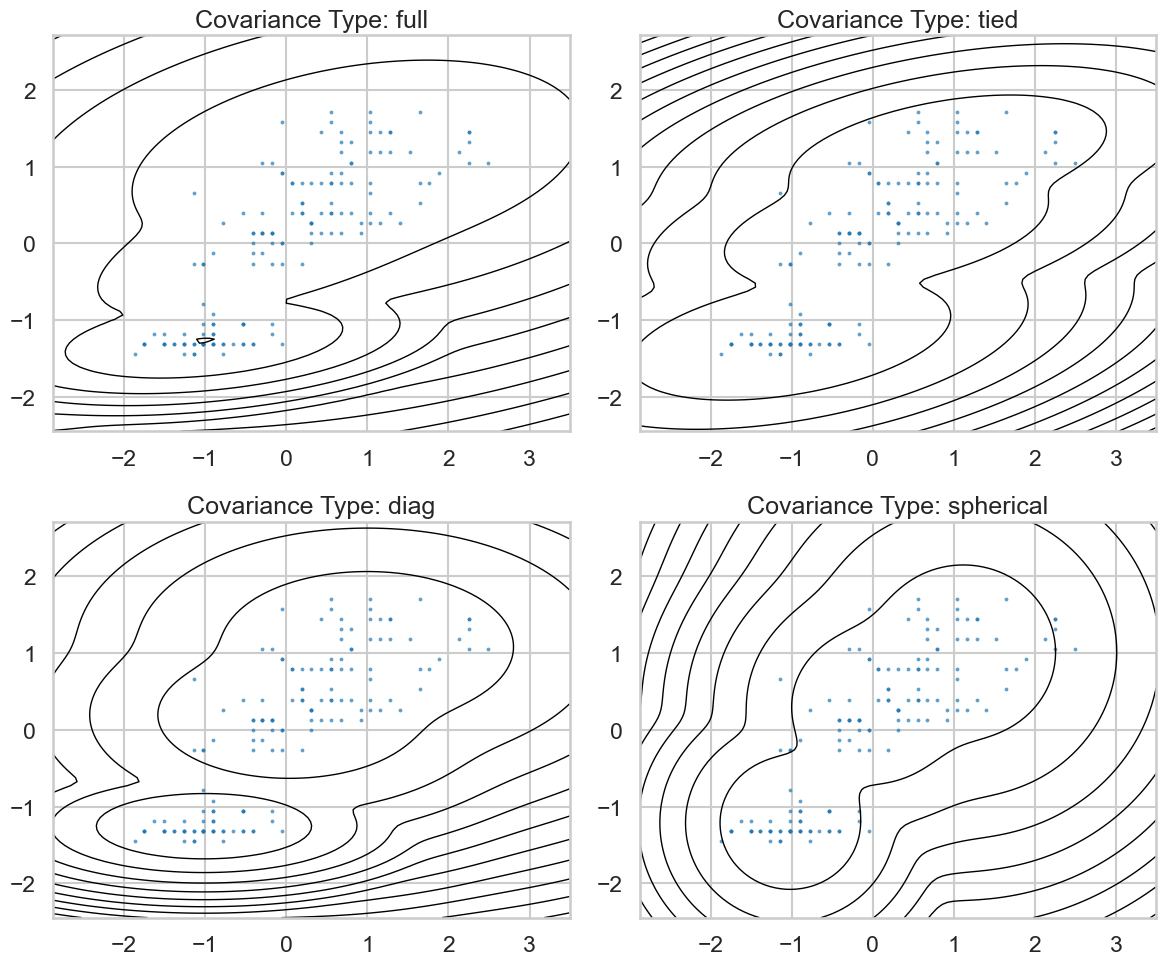

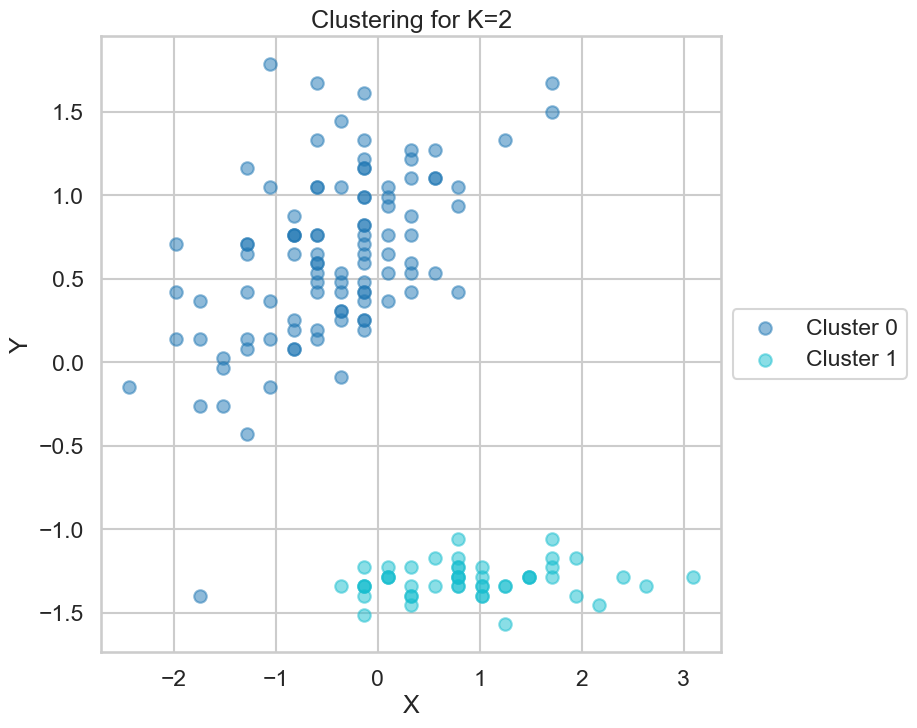

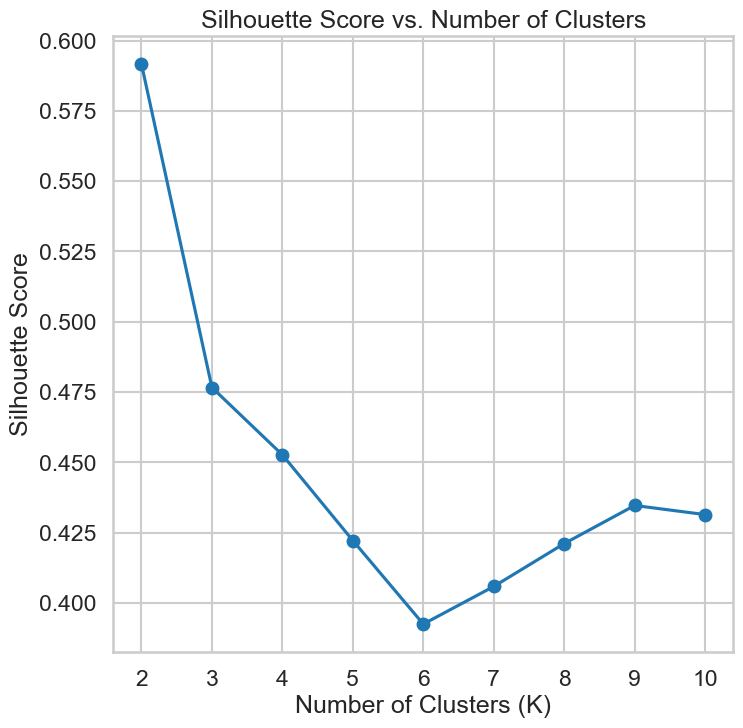

Affinity: euclidean, Linkage: average, Distance Threshold: 0.1, Silhouette Score: 0.4483871878954013
Affinity: euclidean, Linkage: average, Distance Threshold: 0.5, Silhouette Score: 0.4462078230500773
Affinity: euclidean, Linkage: average, Distance Threshold: 1.0, Silhouette Score: 0.3452105938929492
Affinity: euclidean, Linkage: single, Distance Threshold: 0.1, Silhouette Score: 0.4427254503793684
Affinity: euclidean, Linkage: single, Distance Threshold: 0.5, Silhouette Score: 0.424468630620718
Affinity: euclidean, Linkage: single, Distance Threshold: 1.0, Silhouette Score: 0.5209723704192766
Affinity: manhattan, Linkage: average, Distance Threshold: 0.1, Silhouette Score: 0.437146447348862
Affinity: manhattan, Linkage: average, Distance Threshold: 0.5, Silhouette Score: 0.41822506846649415
Affinity: manhattan, Linkage: average, Distance Threshold: 1.0, Silhouette Score: 0.35666357176204105
Affinity: manhattan, Linkage: single, Distance Threshold: 0.1, Silhouette Score: 0.44272545037

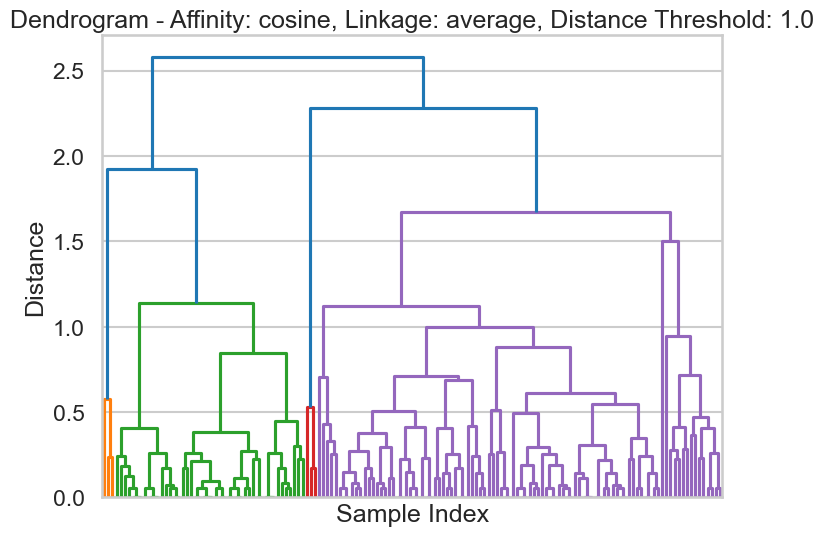

Best Silhouette Score: 0.591660002935989
Best Parameters: {'affinity': 'cosine', 'linkage': 'average', 'distance_threshold': 1.0}


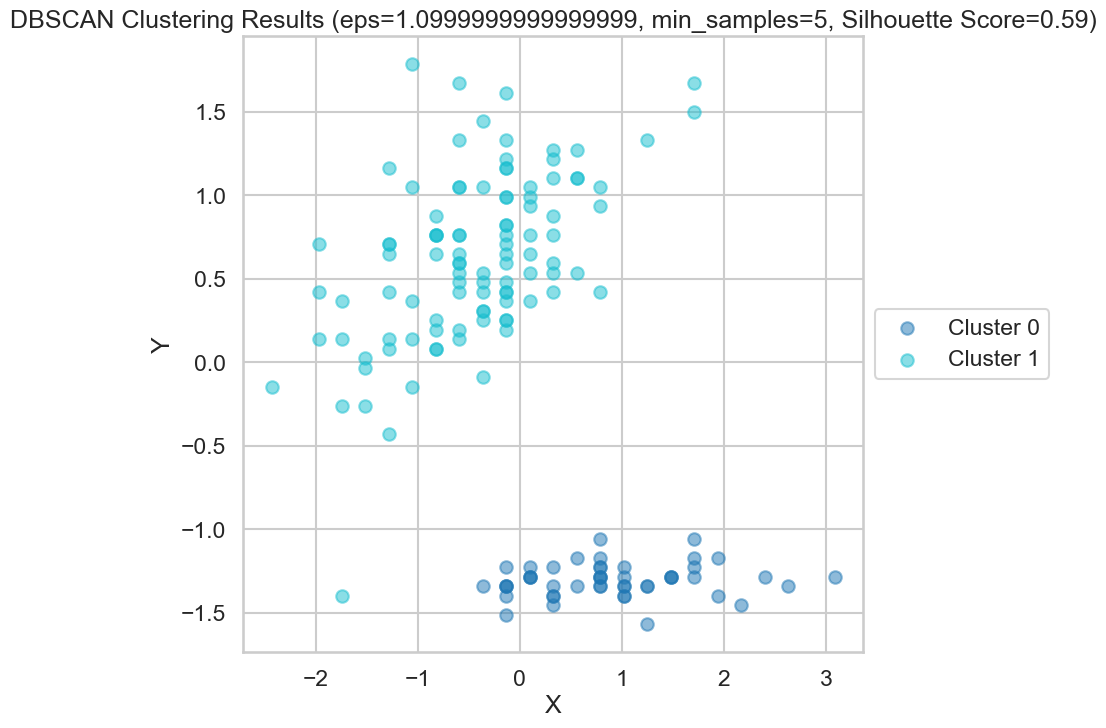

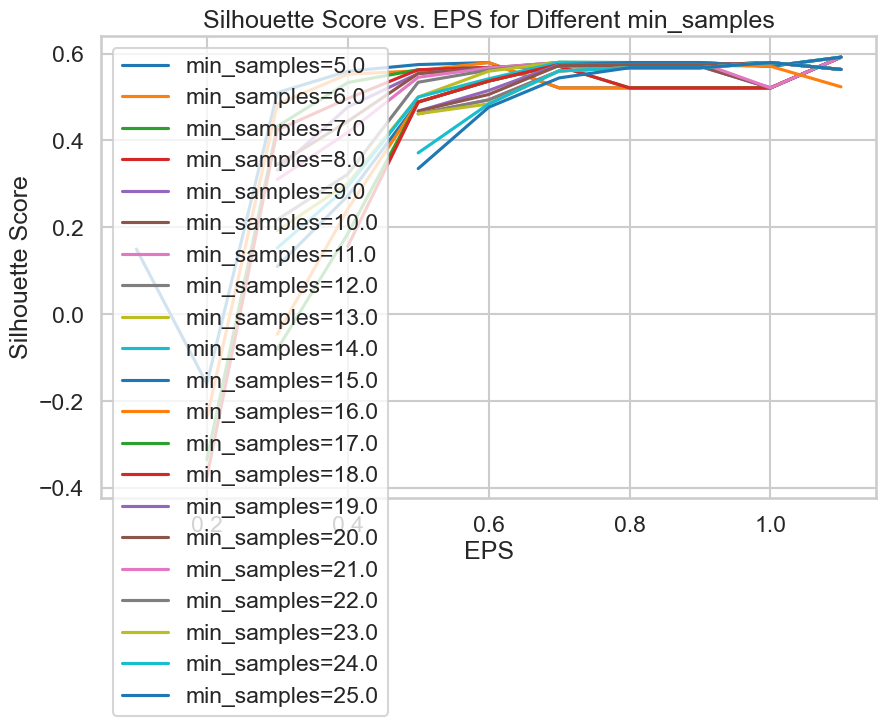

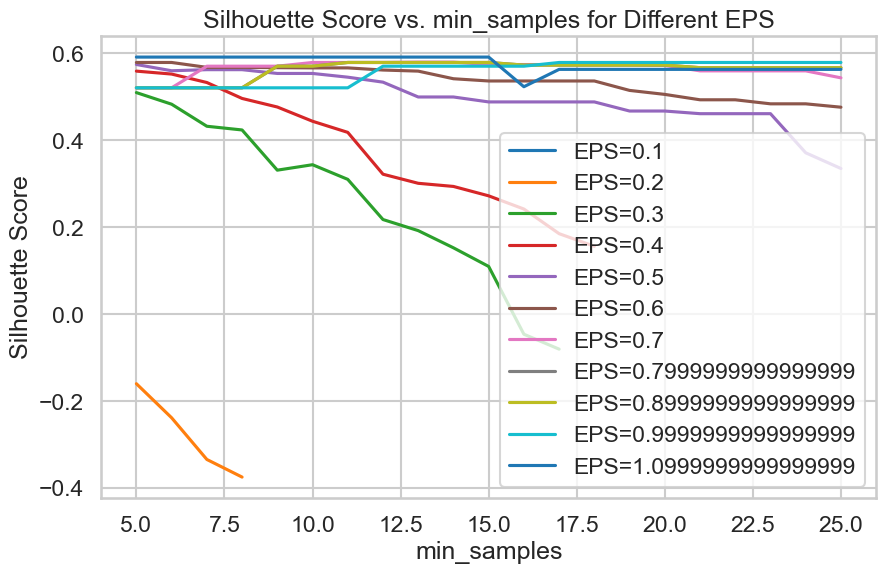

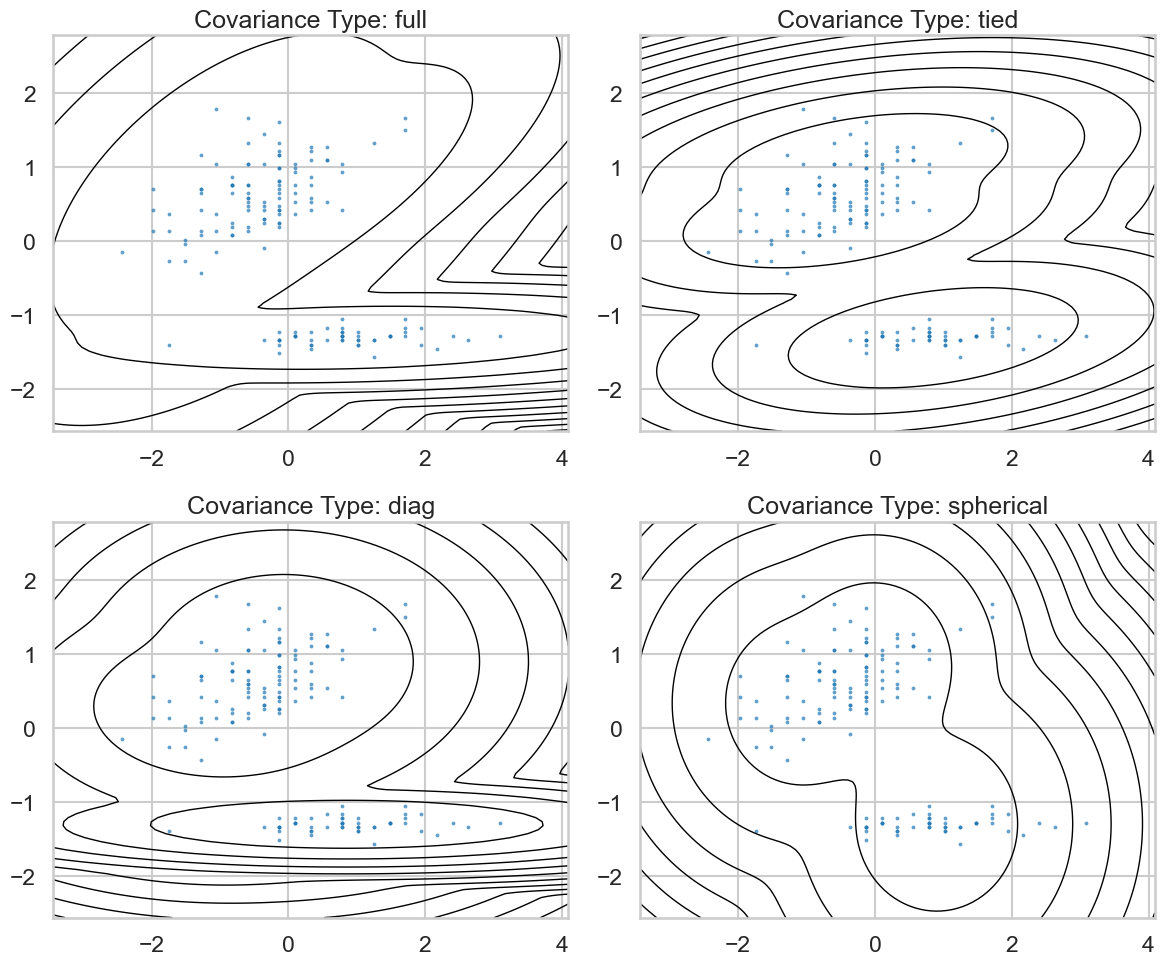

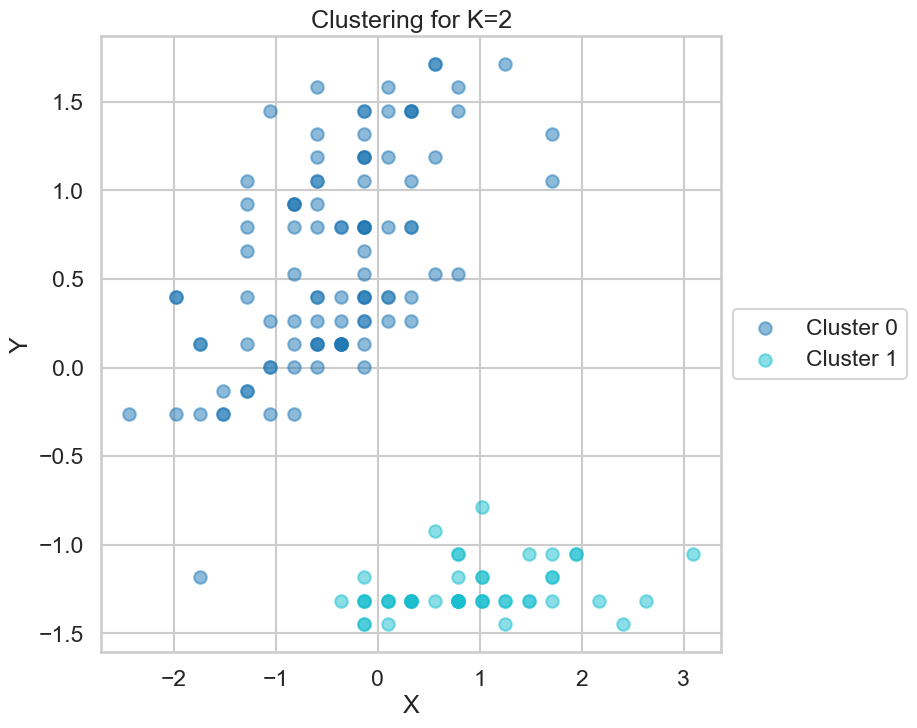

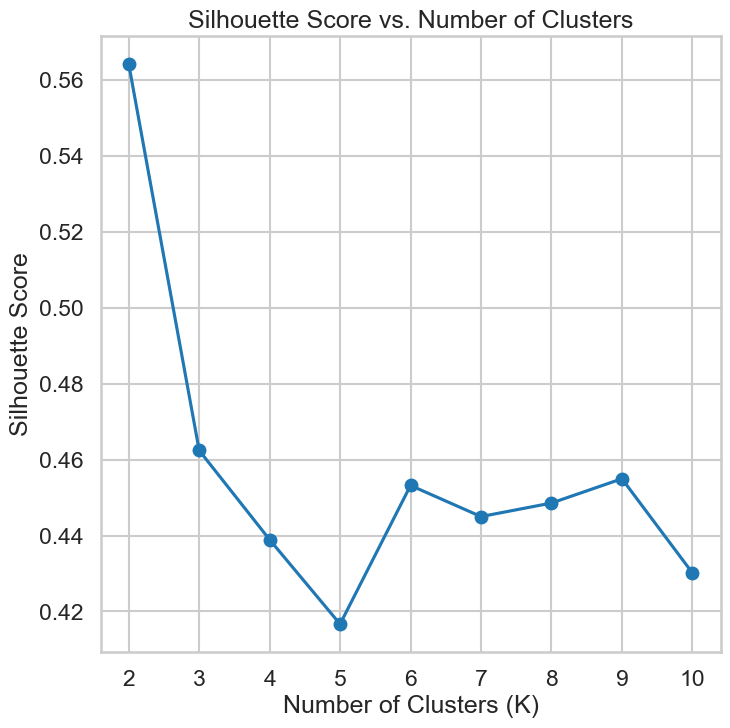

Affinity: euclidean, Linkage: average, Distance Threshold: 0.1, Silhouette Score: 0.5599999879250109
Affinity: euclidean, Linkage: average, Distance Threshold: 0.5, Silhouette Score: 0.438251234526095
Affinity: euclidean, Linkage: average, Distance Threshold: 1.0, Silhouette Score: 0.37358708653573314
Affinity: euclidean, Linkage: single, Distance Threshold: 0.1, Silhouette Score: 0.5599999879250109
Affinity: euclidean, Linkage: single, Distance Threshold: 0.5, Silhouette Score: 0.3568581790355911
Affinity: euclidean, Linkage: single, Distance Threshold: 1.0, Silhouette Score: 0.564186885333767
Affinity: manhattan, Linkage: average, Distance Threshold: 0.1, Silhouette Score: 0.5599999879250109
Affinity: manhattan, Linkage: average, Distance Threshold: 0.5, Silhouette Score: 0.39337847878782073
Affinity: manhattan, Linkage: average, Distance Threshold: 1.0, Silhouette Score: 0.3924045287817299
Affinity: manhattan, Linkage: single, Distance Threshold: 0.1, Silhouette Score: 0.55999998792

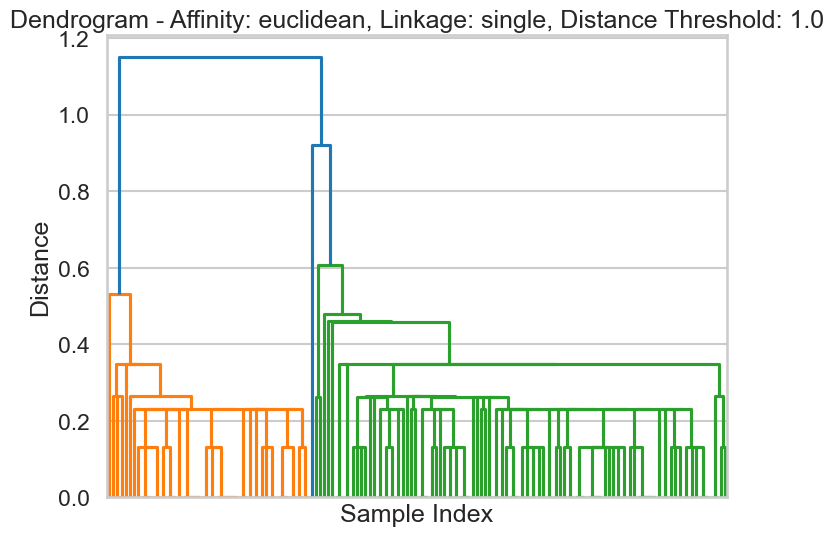

Best Silhouette Score: 0.564186885333767
Best Parameters: {'affinity': 'euclidean', 'linkage': 'single', 'distance_threshold': 1.0}


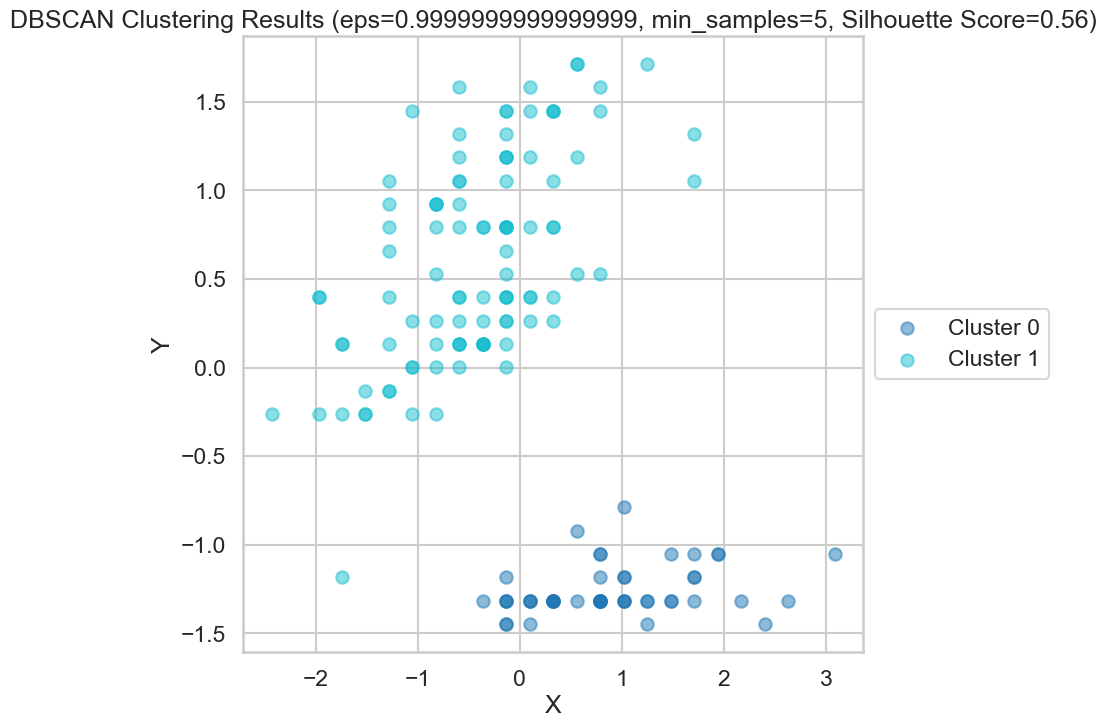

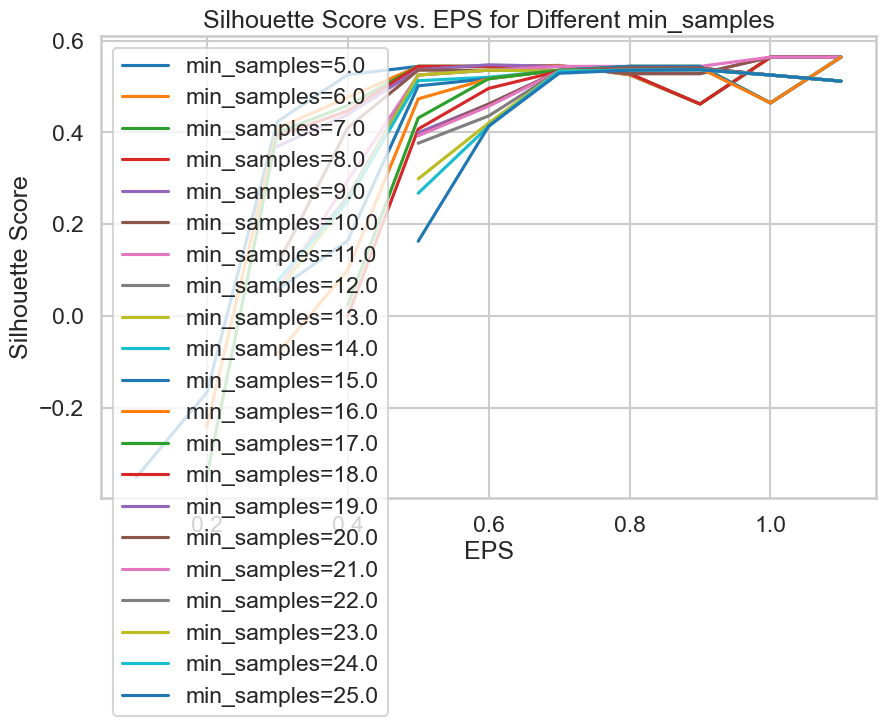

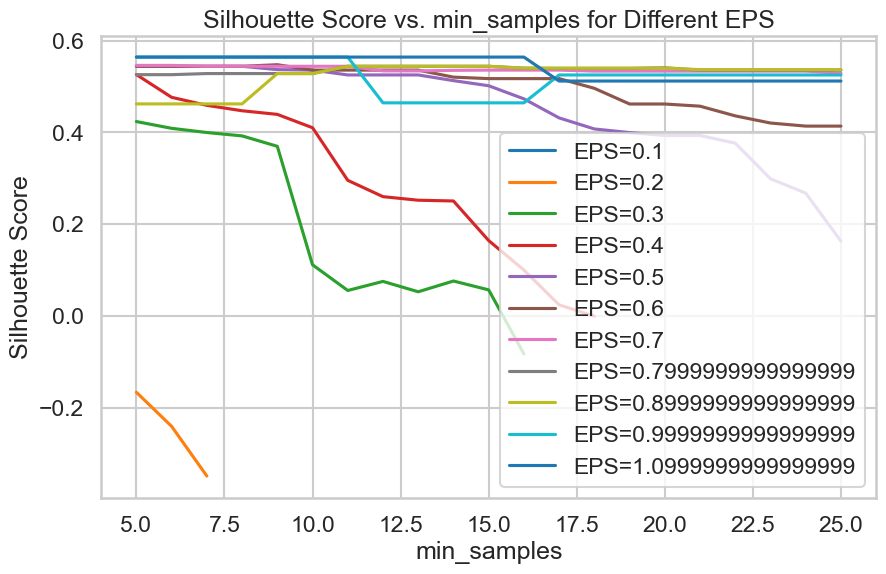

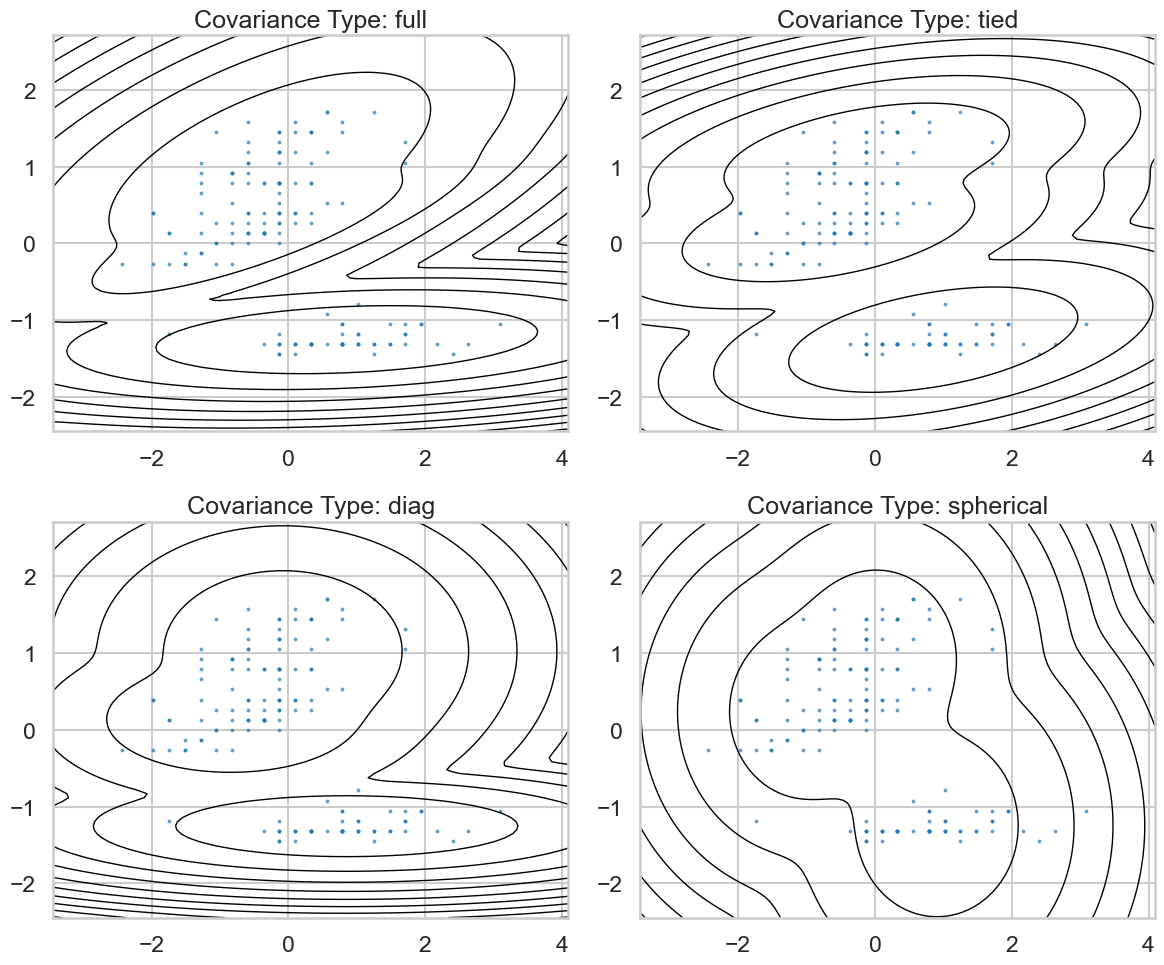

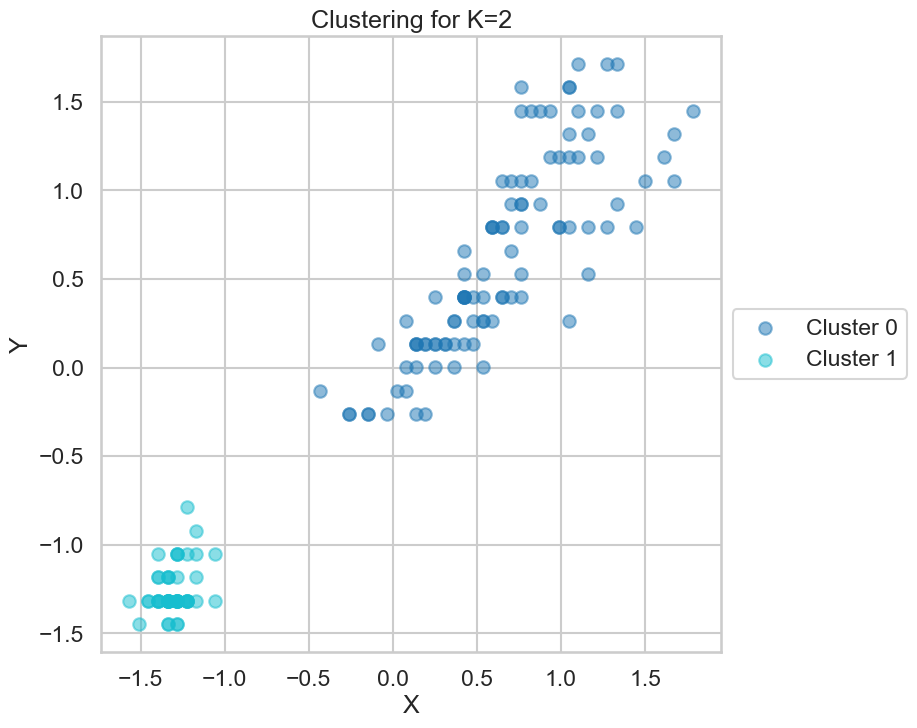

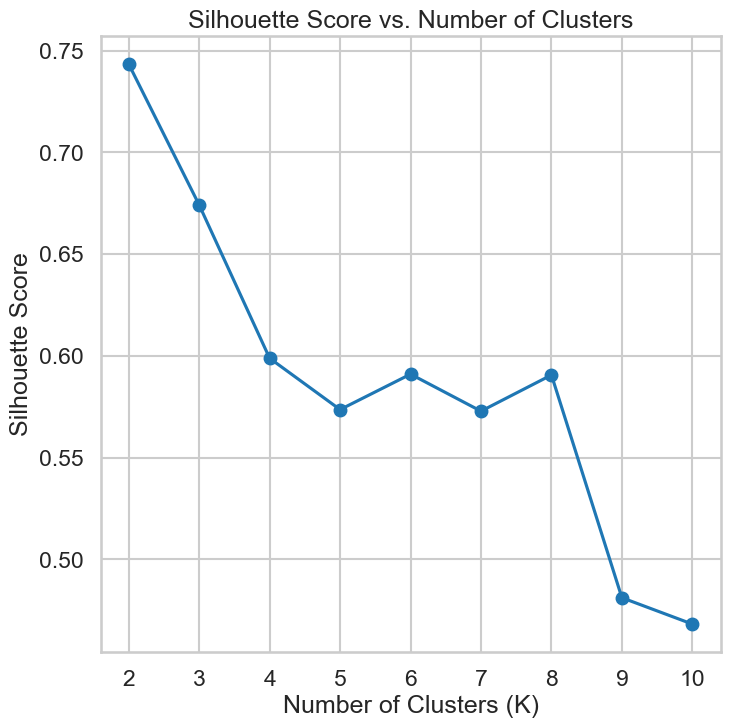

Affinity: euclidean, Linkage: average, Distance Threshold: 0.1, Silhouette Score: 0.41729664814121215
Affinity: euclidean, Linkage: average, Distance Threshold: 0.5, Silhouette Score: 0.5593351734050636
Affinity: euclidean, Linkage: average, Distance Threshold: 1.0, Silhouette Score: 0.6654764831155726
Affinity: euclidean, Linkage: single, Distance Threshold: 0.1, Silhouette Score: 0.36869822668173774
Affinity: euclidean, Linkage: single, Distance Threshold: 0.5, Silhouette Score: 0.7433719503339133
Affinity: euclidean, Linkage: single, Distance Threshold: 1.0, Silhouette Score: 0.7433719503339133
Affinity: manhattan, Linkage: average, Distance Threshold: 0.1, Silhouette Score: 0.41729664814121215
Affinity: manhattan, Linkage: average, Distance Threshold: 0.5, Silhouette Score: 0.579393628681762
Affinity: manhattan, Linkage: average, Distance Threshold: 1.0, Silhouette Score: 0.5904335961519697
Affinity: manhattan, Linkage: single, Distance Threshold: 0.1, Silhouette Score: 0.368698226

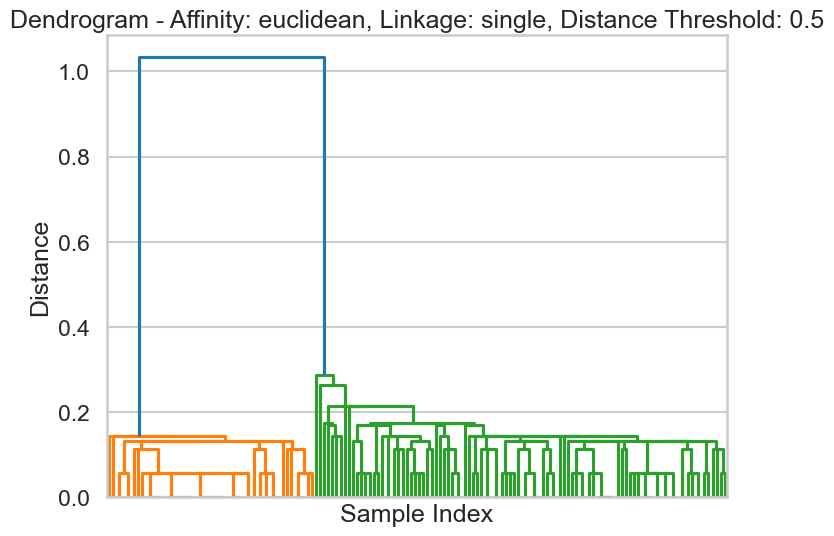

Best Silhouette Score: 0.7433719503339133
Best Parameters: {'affinity': 'euclidean', 'linkage': 'single', 'distance_threshold': 0.5}


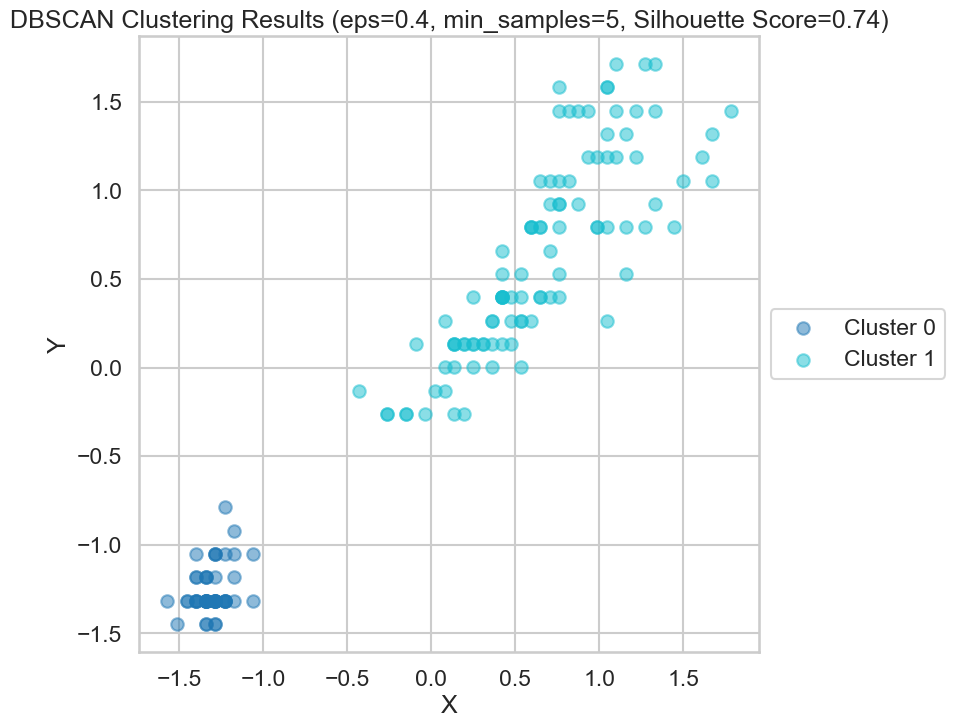

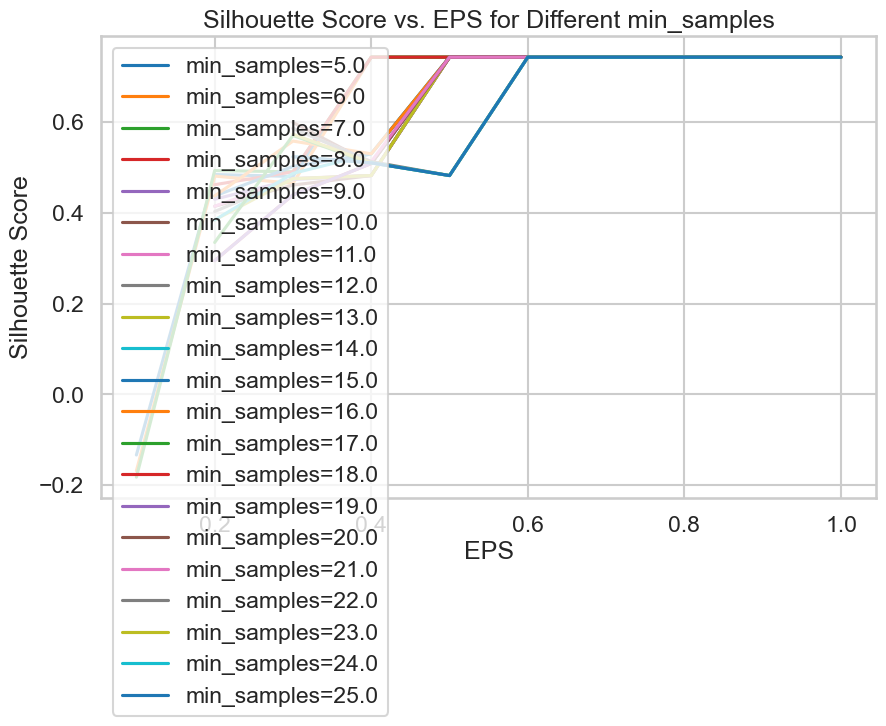

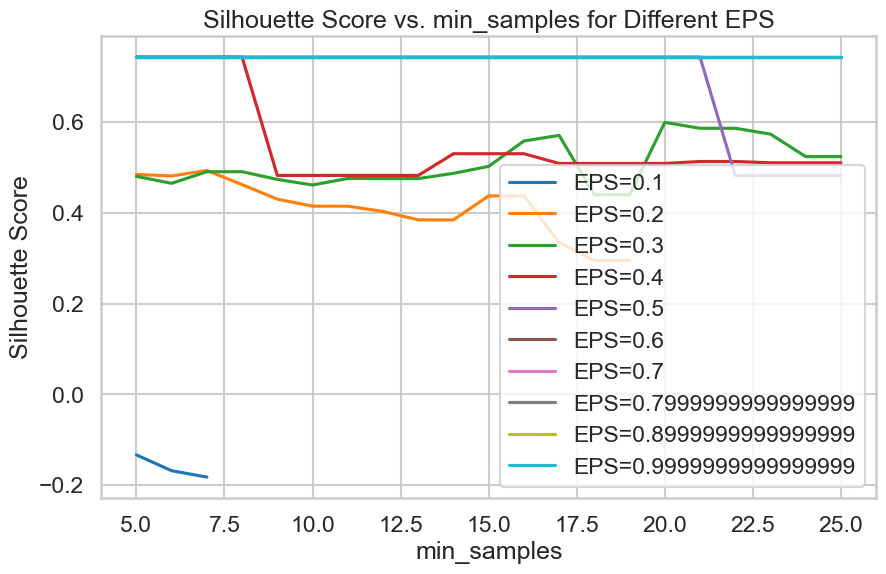

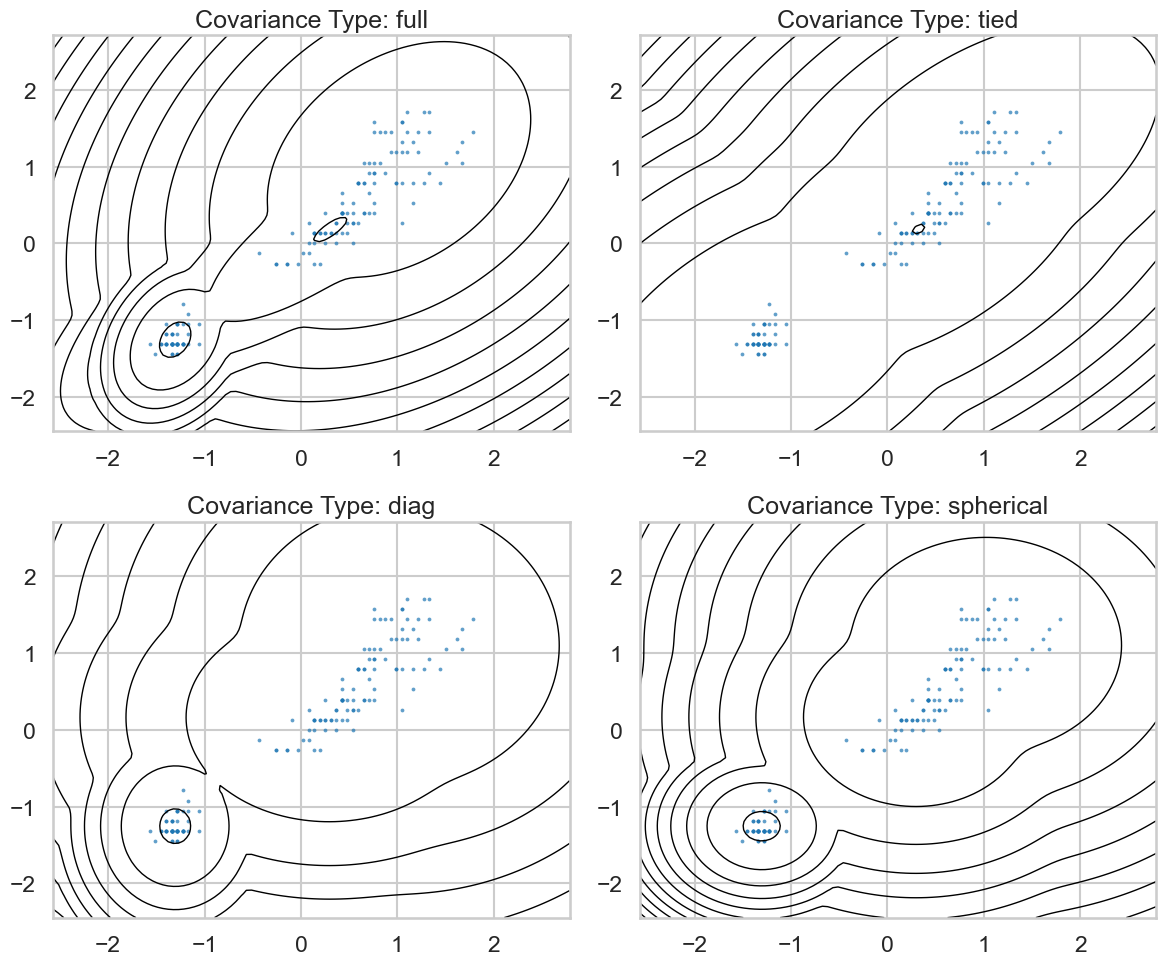

In [19]:
def plot_feature_pairs(X, y, feature_names):
    # Plot each pair of features against each other
    for i in range(len(feature_names)):
        for j in range(i+1, len(feature_names)):
            features_subset = X[:, [i, j]]
            K_Mean(features_subset)
            Hierarchal_Clustering(features_subset)
            DBScan(features_subset)
            Gaussian_cluster(features_subset)
            
iris_data = load_iris()
X = iris_data.data
y = iris_data.target
feature_names = iris_data.feature_names

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Plot feature pairs and perform clustering
plot_feature_pairs(X_scaled, y, feature_names)

# Customer dataset
Repeat all the above on the customer data set 

In [20]:
df = pd.read_csv("Customer data.csv")
df.head()

ID  Sex  Marital status  Age  Education  Income  Occupation  \
0  100000001    0               0   67          2  124670           1   
1  100000002    1               1   22          1  150773           1   
2  100000003    0               0   49          1   89210           0   
3  100000004    0               0   45          1  171565           1   
4  100000005    0               0   53          1  149031           1   

   Settlement size  
0                2  
1                2  
2                0  
3                1  
4                1

In [21]:
data = df.drop(columns=['ID'])
data_matrix = data.values

In [22]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data_matrix)
reduced_data

array([[ 3.71558426e+03,  3.07147829e+01],
       [ 2.98185794e+04, -1.70369432e+01],
       [-3.17444175e+04,  1.64208040e+01],
       ...,
       [-3.45544193e+04, -1.30665084e+00],
       [-2.29864201e+04, -9.49458301e+00],
       [-5.25384199e+04, -5.41988332e+00]])

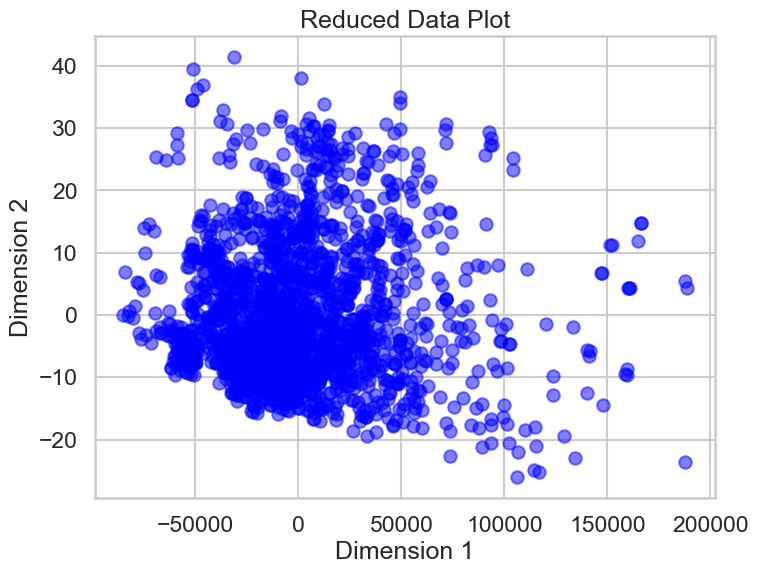

In [23]:
x = [point[0] for point in reduced_data]
y = [point[1] for point in reduced_data]

# Plot the reduced data
plt.figure(figsize=(8, 6))
plt.scatter(x, y, c='blue', alpha=0.5)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Reduced Data Plot')
plt.grid(True)
plt.show()

## Kmeans

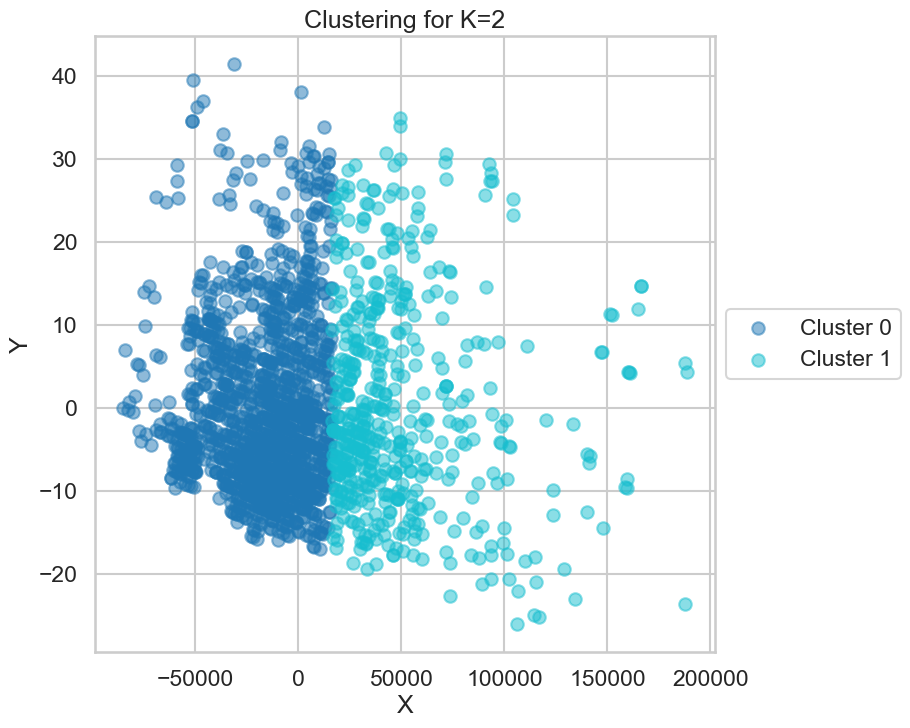

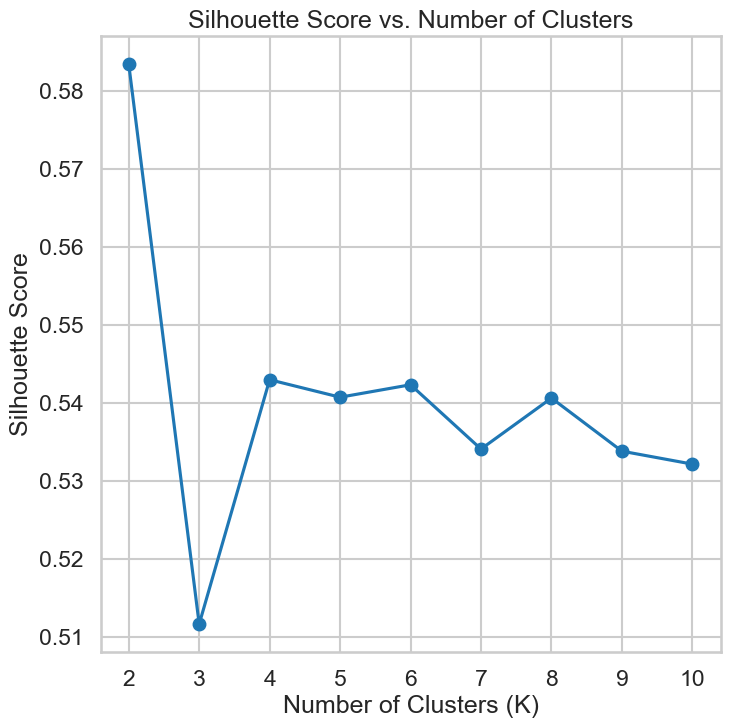

In [63]:
K_Mean(reduced_data)

## Hierarchal Clustering

Affinity: euclidean, Linkage: average, Distance Threshold: 0.1, Silhouette Score: 0.0009999621055541408
Affinity: euclidean, Linkage: average, Distance Threshold: 0.5, Silhouette Score: 0.0009999621055541408
Affinity: euclidean, Linkage: average, Distance Threshold: 1.0, Silhouette Score: 0.004243224212879091
Affinity: euclidean, Linkage: single, Distance Threshold: 0.1, Silhouette Score: 0.0009999621055541408
Affinity: euclidean, Linkage: single, Distance Threshold: 0.5, Silhouette Score: 0.0009999621055541408
Affinity: euclidean, Linkage: single, Distance Threshold: 1.0, Silhouette Score: 0.004243224212879091
Affinity: manhattan, Linkage: average, Distance Threshold: 0.1, Silhouette Score: 0.0009999621055541408
Affinity: manhattan, Linkage: average, Distance Threshold: 0.5, Silhouette Score: 0.0009999621055541408
Affinity: manhattan, Linkage: average, Distance Threshold: 1.0, Silhouette Score: 0.0033120412350771265
Affinity: manhattan, Linkage: single, Distance Threshold: 0.1, Silhou

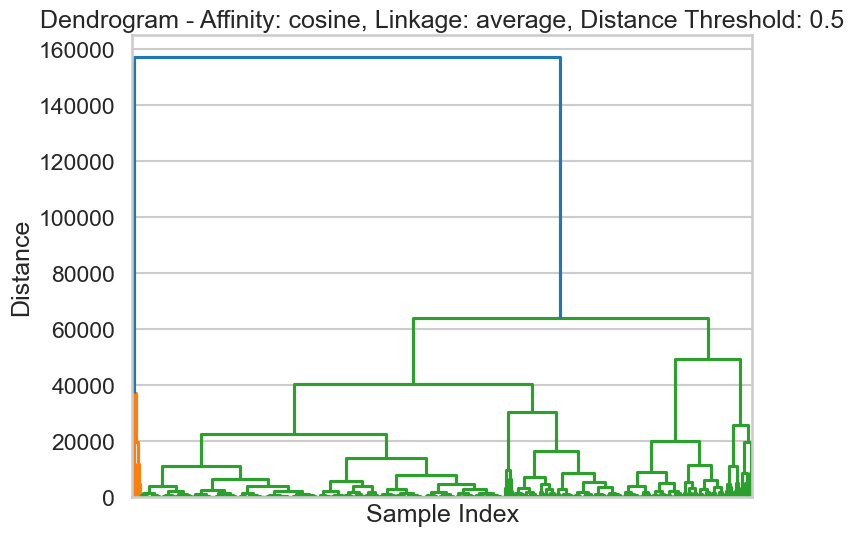

Best Silhouette Score: 0.5157868283775885
Best Parameters: {'affinity': 'cosine', 'linkage': 'average', 'distance_threshold': 0.5}


In [64]:
Hierarchal_Clustering(reduced_data)

## DBScan

In [53]:
def DBScan(iris_data):
    # Define parameter ranges
    eps_values = np.linspace(0.1, 3, 30)
    min_samples_values = np.arange(1, 11)  # Adjusted minimum samples range

    # Initialize variables to store best score and parameters
    best_score = -1
    best_parameters = None
    silhouette_scores = []

    # Perform grid search over parameter combinations
    for eps in eps_values:
        for min_samples in min_samples_values:
            # Fit DBSCAN model
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            cluster_labels = dbscan.fit_predict(iris_data)

            # Check if more than one cluster is formed
            if len(np.unique(cluster_labels)) > 1:
                # Calculate silhouette score
                silhouette_avg = silhouette_score(iris_data, cluster_labels)
                silhouette_scores.append((eps, min_samples, silhouette_avg))

                # Update best score and parameters
                if silhouette_avg > best_score:
                    best_score = silhouette_avg
                    best_parameters = (eps, min_samples)

    # Check if suitable parameters are found
    if best_parameters is not None:
        best_eps, best_min_samples = best_parameters
        print(f"Best parameters - eps: {best_eps}, min_samples: {best_min_samples}, silhouette_score: {best_score}")

        # Fit DBSCAN with best parameters
        dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
        best_cluster_labels = dbscan.fit_predict(iris_data)

        # Plot DBSCAN clustering result
        plt.scatter(iris_data[:, 0], iris_data[:, 1], c=best_cluster_labels, cmap='viridis')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.title('DBSCAN Clustering Result')
        plt.colorbar(label='Cluster')
        plt.show()
    else:
        print("No suitable parameters found for DBSCAN clustering.")

    # Plot silhouette scores
    silhouette_scores = np.array(silhouette_scores)
    plt.figure(figsize=(10, 6))
    for min_samples in min_samples_values:
        scores = silhouette_scores[silhouette_scores[:, 1] == min_samples]
        plt.plot(scores[:, 0], scores[:, 2], label=f'min_samples={min_samples}')

    plt.xlabel('EPS')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score vs. EPS for Different min_samples')
    plt.legend()
    plt.grid(True)
    plt.show()


Best parameters - eps: 0.1, min_samples: 2, silhouette_score: 0.12542096600535843


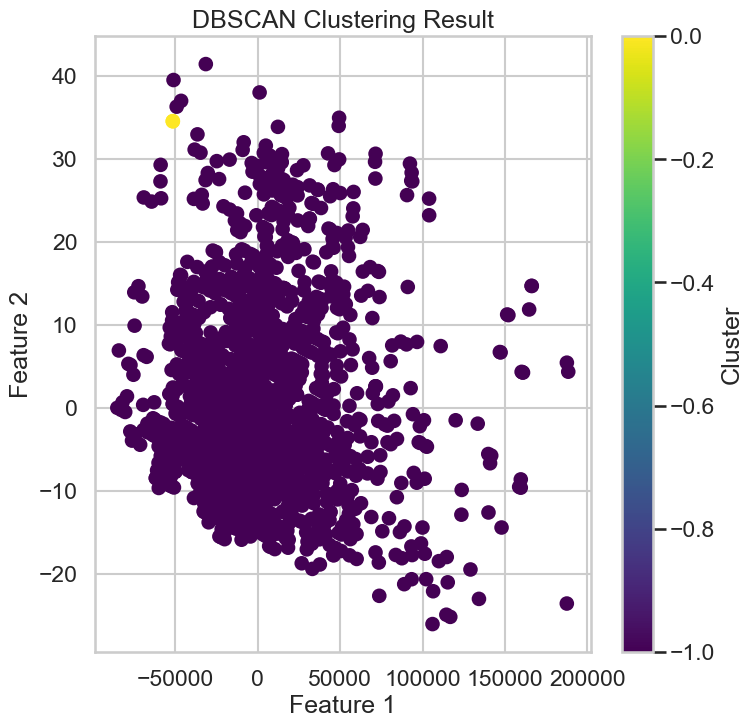

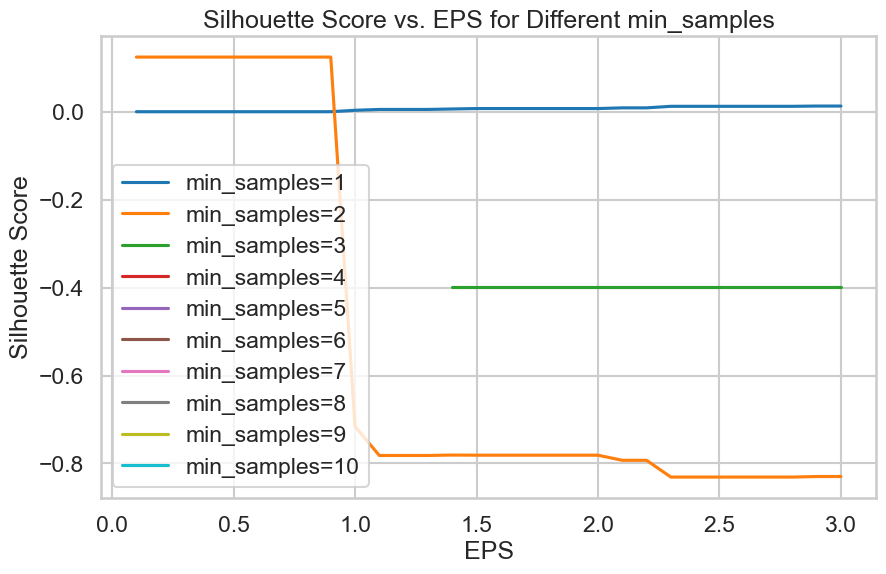

In [54]:
DBScan(reduced_data)

## Gaussian Mixture

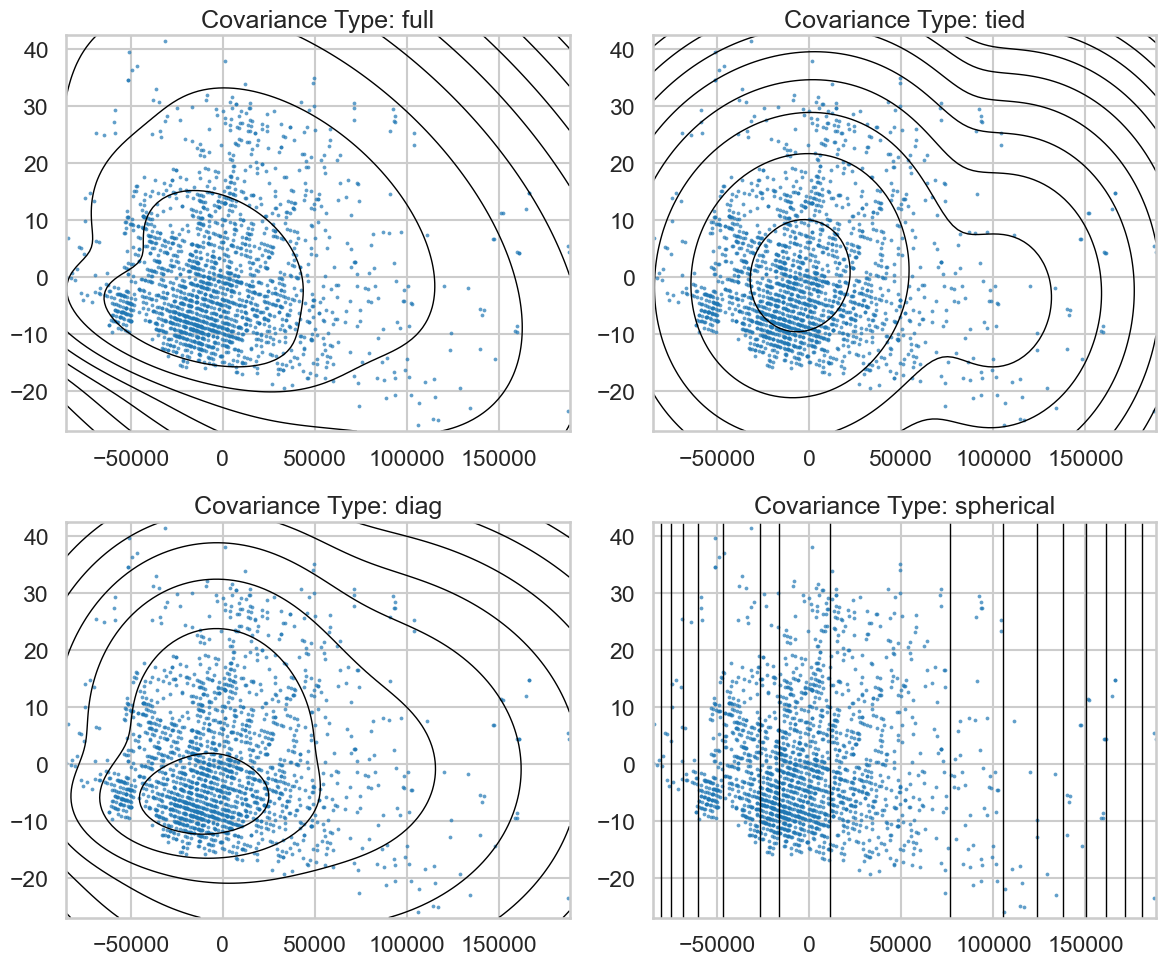

In [65]:
Gaussian_cluster(reduced_data)